# Optimizing Portfolio Allocation Using Sharpe Ratio

**Author:** Your Name  
**Date:** August 2024

## Introduction

In this project, we aim to optimize portfolio allocation by maximizing the Sharpe ratio. The Sharpe ratio is a measure of risk-adjusted return, and by optimizing it, we can better understand the trade-offs between risk and return in our investment strategy.

### Objectives:
- To collect and analyze historical stock data for selected companies.
- To implement a portfolio allocation model that adjusts weights based on maximizing the Sharpe ratio.
- To simulate the portfolio's performance over time and evaluate the effectiveness of the strategy.

The project leverages real-world financial data sourced from Yahoo Finance and utilizes Python for data processing and simulation.


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


### Let's focus on the following problem: Imagine you are a portfolio manager that focuses in the industry of Tech and Healtcare. Someone comes new and givess you all the restrictions.


## Data Collection

For this project, we collected historical stock data for two major sectors: technology and healthcare. The data spans from January 1, 2021, to August 1, 2024. We selected 10 representative stocks from each sector, resulting in a diverse portfolio.

### Selected Stocks:

#### Technology Sector:
- **AAPL:** Apple Inc.
- **MSFT:** Microsoft Corporation
- **GOOGL:** Alphabet Inc.
- **NVDA:** NVIDIA Corporation
- **AMZN:** Amazon.com, Inc.
- **TSLA:** Tesla, Inc.
- **META:** Meta Platforms, Inc.
- **CSCO:** Cisco Systems, Inc.
- **INTC:** Intel Corporation
- **ORCL:** Oracle Corporation

#### Healthcare Sector:
- **JNJ:** Johnson & Johnson
- **PFE:** Pfizer Inc.
- **MRK:** Merck & Co., Inc.
- **ABBV:** AbbVie Inc.
- **UNH:** UnitedHealth Group Incorporated
- **ABT:** Abbott Laboratories
- **BMY:** Bristol-Myers Squibb Company
- **AMGN:** Amgen Inc.
- **LLY:** Eli Lilly and Company
- **GILD:** Gilead Sciences, Inc.

We used the `yfinance` library to download daily adjusted closing prices for these stocks, which reflect price adjustments for dividends, stock splits, and other corporate actions.


In [4]:
tech_stocks = [
    'AAPL',  # Apple Inc.
    'MSFT',  # Microsoft Corporation
    'GOOGL', # Alphabet Inc.
    'NVDA',  # NVIDIA Corporation
    'AMZN',  # Amazon.com, Inc.
    'TSLA',  # Tesla, Inc.
    'META',  # Facebook, Inc. (Meta Platforms)
    'CSCO',  # Cisco Systems, Inc.
    'INTC',  # Intel Corporation
    'ORCL'   # Oracle Corporation
]

healthcare_stocks = [
    'JNJ',  # Johnson & Johnson
    'PFE',  # Pfizer Inc.
    'MRK',  # Merck & Co., Inc.
    'ABBV', # AbbVie Inc.
    'UNH',  # UnitedHealth Group Incorporated
    'ABT',  # Abbott Laboratories
    'BMY',  # Bristol-Myers Squibb Company
    'AMGN', # Amgen Inc.
    'LLY',  # Eli Lilly and Company
    'GILD'  # Gilead Sciences, Inc.
]

all_stocks = tech_stocks + healthcare_stocks

stock_data = yf.download(all_stocks, start="2021-01-01", end="2024-08-01")['Adj Close']


[*********************100%%**********************]  20 of 20 completed


## Exploratory Data Analysis (EDA) of Stock Prices

In this section, we conduct an Exploratory Data Analysis (EDA) on the historical adjusted closing prices of the selected technology and healthcare stocks. The goal is to gain insights into the data's statistical properties and visualize the trends in stock prices over the period from 2021 to 2024.


### Data Summary and Statistical Overview

First, we provide a summary of the stock data using descriptive statistics. This includes measures such as the mean, standard deviation, minimum, and maximum prices, which offer a glimpse into the variability and central tendencies of the stock prices.

We also check the structure and completeness of the data using the `info()` method.


In [7]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 899 entries, 2021-01-04 to 2024-07-31
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    899 non-null    float64
 1   ABBV    899 non-null    float64
 2   ABT     899 non-null    float64
 3   AMGN    899 non-null    float64
 4   AMZN    899 non-null    float64
 5   BMY     899 non-null    float64
 6   CSCO    899 non-null    float64
 7   GILD    899 non-null    float64
 8   GOOGL   899 non-null    float64
 9   INTC    899 non-null    float64
 10  JNJ     899 non-null    float64
 11  LLY     899 non-null    float64
 12  META    899 non-null    float64
 13  MRK     899 non-null    float64
 14  MSFT    899 non-null    float64
 15  NVDA    899 non-null    float64
 16  ORCL    899 non-null    float64
 17  PFE     899 non-null    float64
 18  TSLA    899 non-null    float64
 19  UNH     899 non-null    float64
dtypes: float64(20)
memory usage: 147.5 KB


In [5]:
stock_data.describe()

Ticker,AAPL,ABBV,ABT,AMGN,AMZN,BMY,CSCO,GILD,GOOGL,INTC,JNJ,LLY,META,MRK,MSFT,NVDA,ORCL,PFE,TSLA,UNH
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000
mean,160.228687,132.761078,108.028360,239.029873,144.682745,58.476342,47.645568,66.512274,125.700972,39.774984,156.036948,399.247608,288.901166,92.712321,303.691295,35.792495,90.630707,36.873111,238.205462,464.780206
std,23.939226,24.101220,8.305715,33.281414,29.458295,8.274868,4.131058,8.847628,22.773393,9.471703,7.078302,201.337090,108.693891,20.542477,63.255102,28.531962,20.943691,7.269128,55.700119,58.024076
min,114.210655,88.846863,88.842117,183.583115,81.820000,39.460003,37.182934,51.811588,83.334358,23.823753,139.879196,157.579407,88.727669,61.864471,205.945862,11.217703,57.206432,24.538410,108.099998,308.583923
25%,142.581566,106.369003,102.500580,215.711967,121.525002,52.837128,45.381910,58.564056,107.048889,31.034698,150.667061,245.533150,198.152809,71.820004,251.387970,16.921362,74.564899,30.520633,196.169998,438.157181
50%,159.374420,136.999207,107.260002,229.093109,151.193497,58.841927,47.909550,64.225853,125.865547,39.890255,155.583755,323.802826,298.556519,89.296646,288.803711,23.487545,85.457458,36.328541,235.580002,480.971893
75%,176.491959,147.923630,112.923054,261.451340,169.047005,65.332840,50.586390,74.459156,139.668701,48.057358,160.350746,548.500031,341.707825,106.732052,333.019913,44.672466,108.696491,43.432596,269.334991,506.051453
max,234.820007,186.779999,134.358368,335.970001,200.000000,75.402275,58.717678,85.358162,191.179993,62.083332,174.296173,950.460022,539.909973,132.960007,467.559998,135.580002,144.770004,54.310184,409.970001,576.330017


### Visualizing Stock Price Trends

To better understand how stock prices have evolved over time, we visualize the adjusted closing prices of the selected stocks. This helps in identifying trends, patterns, and any significant price movements within the technology and healthcare sectors.


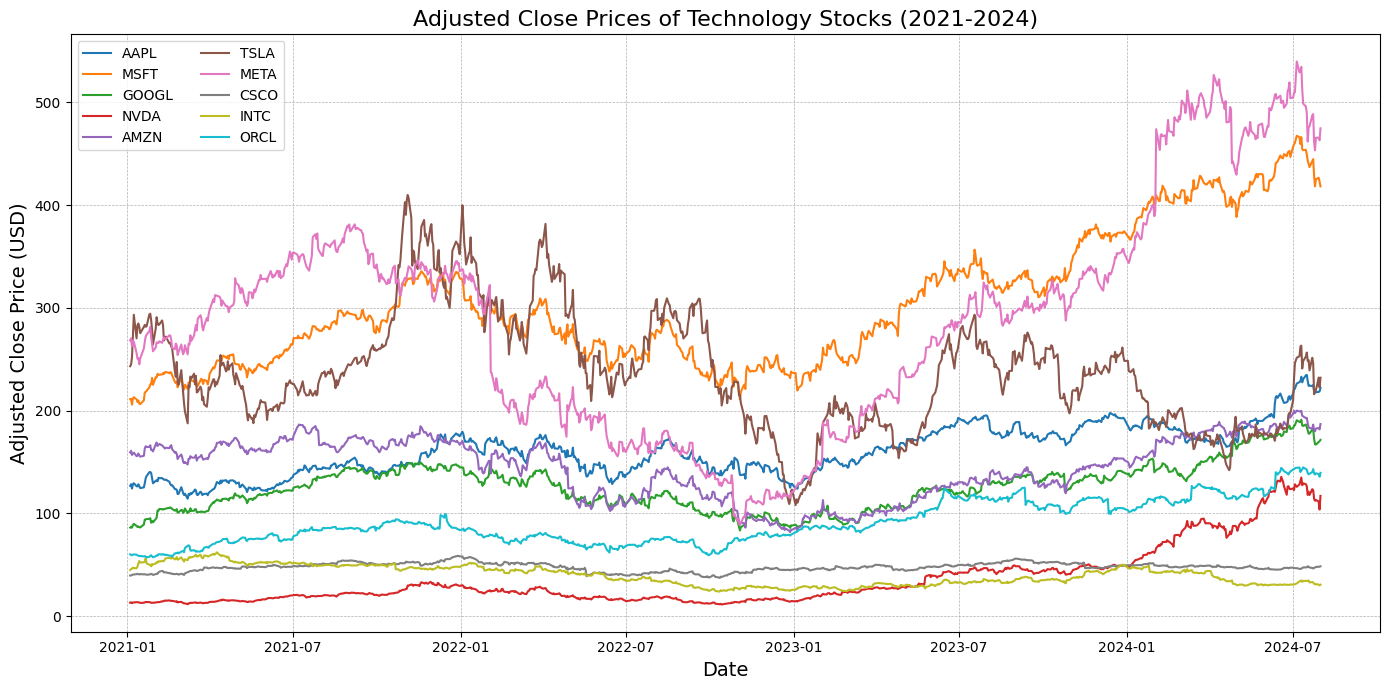

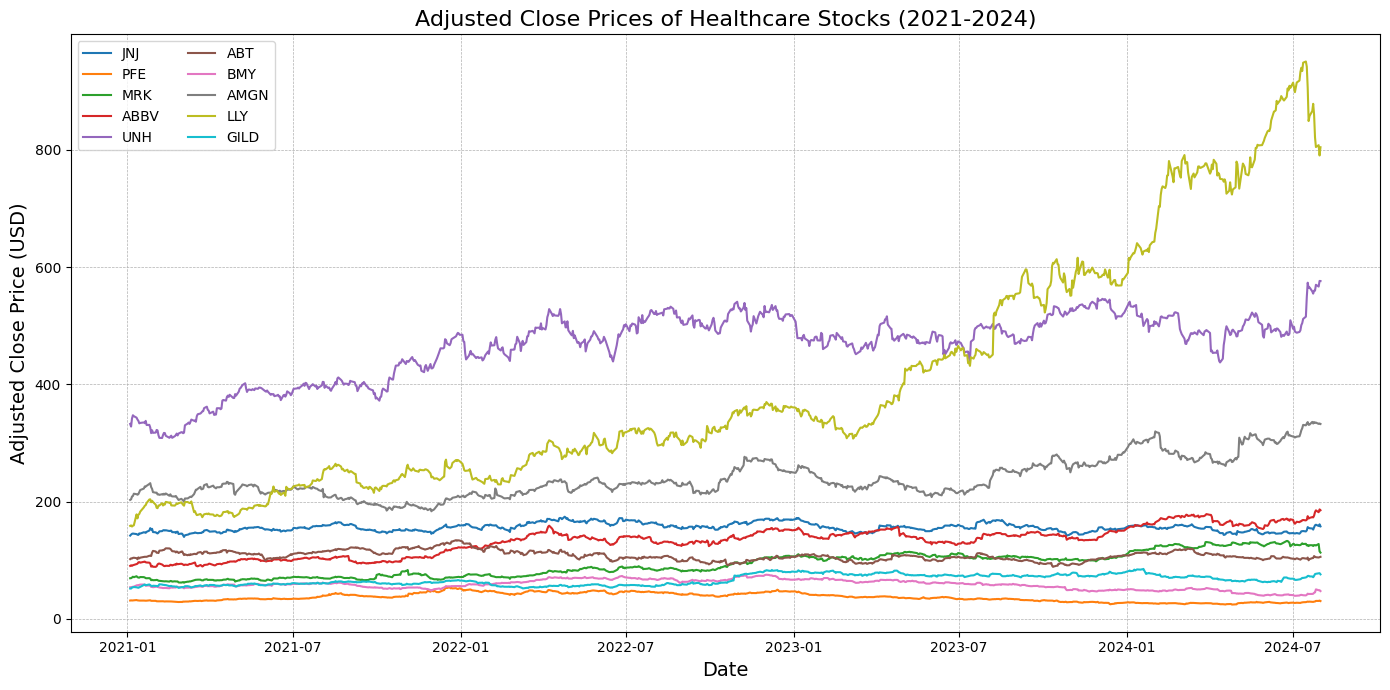

In [6]:
# Plot Technology Stocks
plt.figure(figsize=(14, 7))
for stock in tech_stocks:
    plt.plot(stock_data.index, stock_data[stock], label=stock)

plt.title('Adjusted Close Prices of Technology Stocks (2021-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Plot Healthcare Stocks
plt.figure(figsize=(14, 7))
for stock in healthcare_stocks:
    plt.plot(stock_data.index, stock_data[stock], label=stock)

plt.title('Adjusted Close Prices of Healthcare Stocks (2021-2024)', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Adjusted Close Price (USD)', fontsize=14)
plt.legend(loc='upper left', fontsize=10, ncol=2)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### Analyzing Daily Returns

In this section, we delve into the daily returns of the selected stocks within the technology and healthcare sectors. By examining the distribution of daily returns, we can gain insights into the volatility and risk associated with each stock. The histograms of daily returns will provide a visual representation of the return distributions, allowing us to observe characteristics such as skewness, kurtosis, and the presence of any outliers.


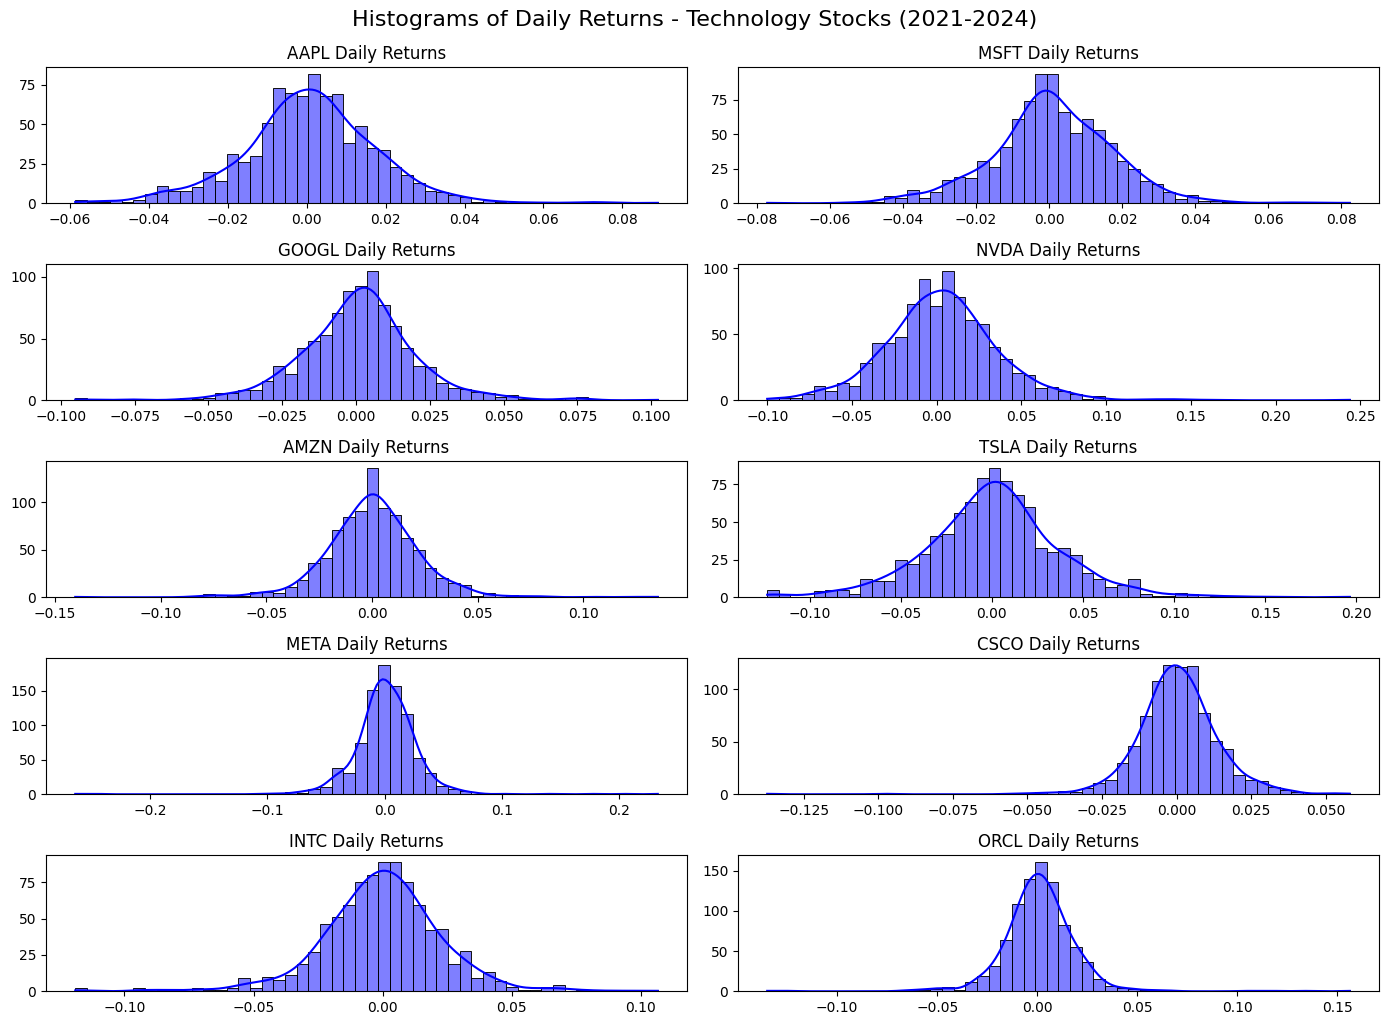

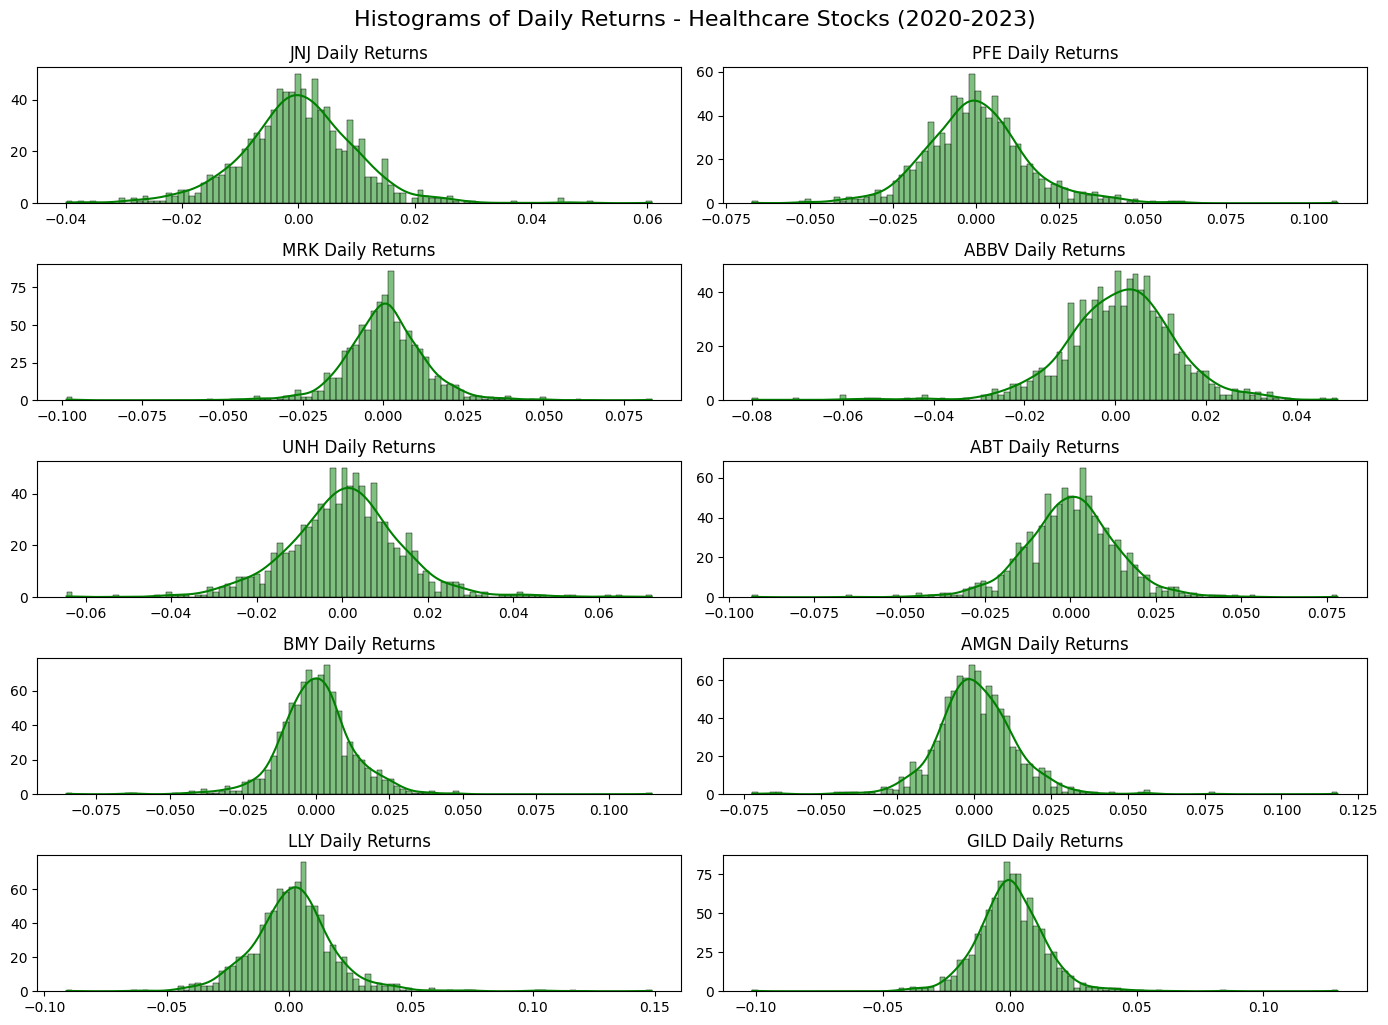

In [9]:
# Calculate daily returns
daily_returns = stock_data.pct_change().dropna()

# Plot histograms of daily returns for Technology Stocks
plt.figure(figsize=(14, 10))
for i, stock in enumerate(tech_stocks, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns for 10 stocks
    sns.histplot(daily_returns[stock], bins=50, kde=True, color='blue')
    plt.title(f'{stock} Daily Returns')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Histograms of Daily Returns - Technology Stocks (2021-2024)', fontsize=16, y=1.02)
plt.show()

# Plot histograms of daily returns for Healthcare Stocks
plt.figure(figsize=(14, 10))
for i, stock in enumerate(healthcare_stocks, 1):
    plt.subplot(5, 2, i)  # 5 rows, 2 columns for 10 stocks
    sns.histplot(daily_returns[stock], bins=100, kde=True, color='green')
    plt.title(f'{stock} Daily Returns')
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle('Histograms of Daily Returns - Healthcare Stocks (2021-2024)', fontsize=16, y=1.02)
plt.show()

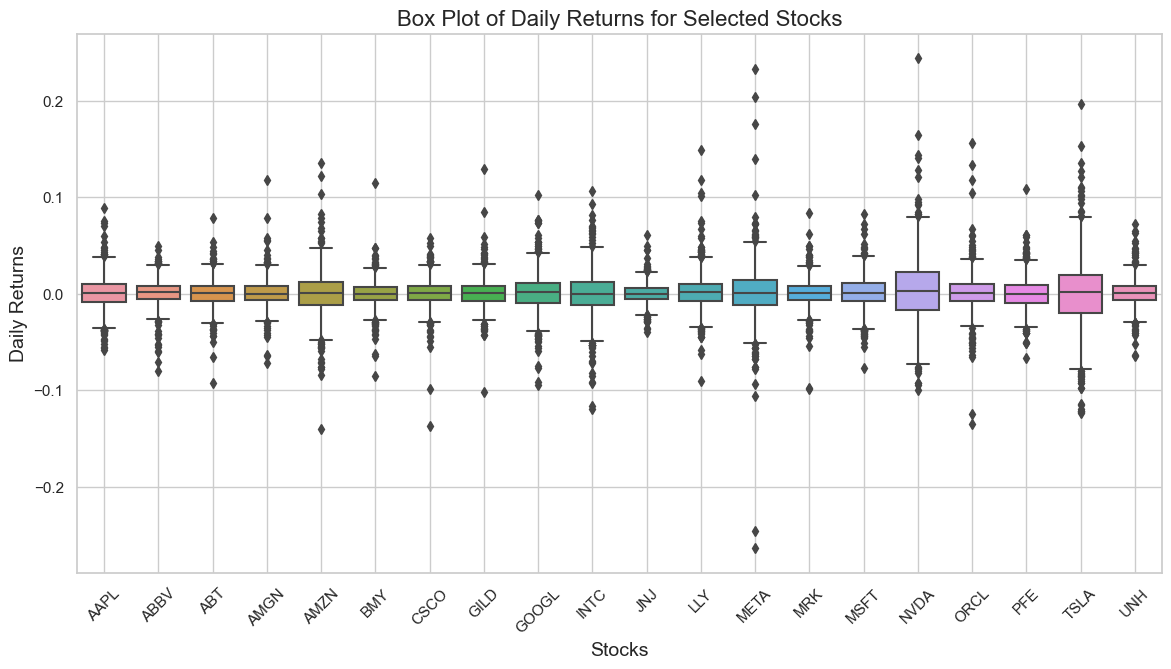

In [11]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Create a box plot for the daily returns of all stocks
plt.figure(figsize=(14, 7))
sns.boxplot(data=daily_returns)

# Customize the plot
plt.title('Box Plot of Daily Returns for Selected Stocks', fontsize=16)
plt.xlabel('Stocks', fontsize=14)
plt.ylabel('Daily Returns', fontsize=14)
plt.xticks(rotation=45)  # Rotate stock labels for better readability
plt.grid(True)

# Show the plot
plt.show()

### Histograms of Daily Returns for Technology and Healthcare Stocks (2021-2024)

1. **Technology Stocks:**
   - The histograms of daily returns for the technology stocks exhibit a distribution that is generally bell-shaped, indicating that most returns cluster around the mean, with fewer extreme positive or negative returns.
   - Some stocks, like **NVDA** and **TSLA**, display a wider range of returns, suggesting higher volatility compared to others such as **AAPL** and **MSFT**. This is evident from the longer tails in the histograms, indicating more frequent occurrences of extreme values.
   - Stocks like **CSCO** and **INTC** have tighter distributions, showing less variation in their daily returns, which could imply more stability but potentially lower growth.

2. **Healthcare Stocks:**
   - The healthcare sector shows similar bell-shaped distributions, though they tend to have slightly narrower spreads, indicating generally lower volatility compared to the tech stocks.
   - Stocks like **UNH** and **LLY** show higher peaks, implying that the returns are more concentrated around the mean, which might indicate more predictable performance.
   - Some stocks, such as **GILD** and **ABT**, show a wider range in returns, indicating they may be more influenced by external factors or events, leading to more variability in their daily performance.

### Box Plot of Daily Returns for Selected Stocks

- The box plot provides a clear comparison of the spread and outliers in the daily returns across the selected stocks.
- **Outliers**: The presence of numerous outliers in the tech stocks like **TSLA**, **NVDA**, and **GOOGL** suggests that these stocks have experienced more extreme daily returns, both positive and negative, during the observed period.
- **Median and Quartiles**:
  - The median line within each box shows where the central tendency of returns lies for each stock. Most stocks have a median close to zero, indicating that over the long run, positive and negative returns have somewhat balanced each other out.
  - The interquartile range (IQR), represented by the height of the box, shows the middle 50% of the data. Wider boxes indicate more variability within the middle of the data, with **NVDA** and **TSLA** having larger IQRs, consistent with their volatile nature.
  - Stocks like **JNJ** and **ABBV** from the healthcare sector have narrower IQRs, reinforcing the idea that they are less volatile and more stable compared to their tech counterparts.

### Key Insights

- **Volatility**: Technology stocks generally exhibit higher volatility compared to healthcare stocks, with certain stocks like **NVDA** and **TSLA** being particularly prone to larger swings in daily returns.
- **Stability**: Healthcare stocks tend to show more stability, with returns clustering closer to the mean, which might make them more attractive for risk-averse investors.
- **Outliers**: The presence of many outliers in tech stocks highlights the risk of significant daily changes, which could be driven by industry innovation, market sentiment, or broader economic factors.

These visualizations and interpretations provide a foundational understanding of the risk-return profile of these sectors, which can be crucial for portfolio construction and risk management strategies.


## Investment Strategies

With the insights gained from the EDA, we are now well-equipped to delve into the next phase: developing and implementing investing strategies. The goal is to identify the best stocks to invest in by leveraging quantitative techniques, optimizing portfolio allocation, and ultimately enhancing returns while managing risk.

In this section, we will explore various strategies to choose the optimal stocks from our selected list. This will include assessing performance metrics, evaluating risk-adjusted returns, and determining the best weights for each stock in the portfolio.

## Investment Strategy: Value Investing

Value investing is a strategy that involves picking stocks that appear to be trading for less than their intrinsic or book value. Value investors actively seek stocks they believe the market is underestimating. This approach often involves looking for companies that are undervalued by various financial metrics, such as Price-to-Earnings (P/E) ratio, Price-to-Book (P/B) ratio, Dividend Yield, and Earnings Growth.

In this section, we will implement the Value Investing strategy by fetching and analyzing fundamental metrics for our selected stocks. The key metrics used in this analysis include:

- **Price-to-Earnings (P/E) Ratio**: A low P/E ratio might suggest that the stock is undervalued relative to its earnings.
- **Price-to-Book (P/B) Ratio**: A low P/B ratio might indicate that the stock is undervalued relative to its book value.
- **Dividend Yield**: A higher dividend yield can be attractive for investors looking for income-generating stocks.
- **Earnings Growth**: Positive earnings growth is a sign that the company is expanding and potentially increasing in value.

### Fetching Fundamental Metrics

We will start by fetching these fundamental metrics for each stock in our selected list. The metrics will be fetched using the `yfinance` library, which provides easy access to financial data for various stocks.

The following code retrieves the fundamental metrics for each stock and compiles them into a DataFrame:


In [13]:

def fetch_fundamental_metrics(tickers):
    # Initialize an empty list to store the results
    fundamental_data = []

    # Loop over each ticker symbol
    for ticker in tickers:
        # Fetching stock information
        stock = yf.Ticker(ticker)
        stock_info = stock.info

        # Extracting fundamental metrics
        pe_ratio = stock_info.get('trailingPE', None)  # Price/Earnings Ratio
        pb_ratio = stock_info.get('priceToBook', None)  # Price/Book Ratio
        dividend_yield = stock_info.get('dividendYield', None)  # Dividend Yield
        earnings_growth = stock_info.get('earningsQuarterlyGrowth', None)  # Earnings Growth (Quarterly)

        fundamental_data.append({
            'Ticker': ticker,
            'P/E Ratio': pe_ratio,
            'P/B Ratio': pb_ratio,
            'Dividend Yield': dividend_yield,
            'Earnings Growth': earnings_growth
        })

    fundamental_df = pd.DataFrame(fundamental_data)
    return fundamental_df

tickers = all_stocks
fundamental_metrics_df = fetch_fundamental_metrics(tickers)

# Display the DataFrame
print(fundamental_metrics_df)


   Ticker   P/E Ratio  P/B Ratio  Dividend Yield  Earnings Growth
0    AAPL   32.913242  49.347332          0.0046            0.079
1    MSFT   34.350254  11.242419          0.0074            0.097
2   GOOGL   23.482067   6.705588          0.0049            0.286
3    NVDA   61.257310  52.427425          0.0004            6.284
4    AMZN   39.842484   7.406388             NaN            0.998
5    TSLA   56.179775   9.610765             NaN           -0.453
6    META   26.457335   8.366242          0.0039            0.729
7    CSCO   15.361486   4.004756          0.0352           -0.413
8    INTC   82.125000   0.731409          0.0254              NaN
9    ORCL   35.595688  41.804367          0.0121           -0.053
10    JNJ   24.262840   5.403896          0.0309           -0.089
11    PFE         NaN   1.844792          0.0588           -0.982
12    MRK   21.212963   6.664534          0.0269              NaN
13   ABBV   63.734898  49.486710          0.0326           -0.323
14    UNH 

### Filtering and Ranking Stocks Based on Value Investing Criteria

After fetching the fundamental metrics for our selected stocks, the next step in the Value Investing strategy is to filter and rank the stocks based on specific financial criteria. The aim is to narrow down the list to stocks that exhibit strong value characteristics, such as favorable price ratios, dividend yields, and earnings growth.


In [25]:
# Define criteria for filtering
pe_threshold = 65  # Allowing for higher P/E ratios given some high-growth stocks
pb_threshold = 50  # Accepting higher P/B ratios due to the nature of some stocks
dividend_yield_threshold = 0.004  # Slightly lower yield threshold to include more stocks
earnings_growth_threshold = 0.01  # Lower growth threshold to include steady growers

# Filter stocks based on the criteria
filtered_stocks = fundamental_metrics_df[
    (fundamental_metrics_df['P/E Ratio'] < pe_threshold) &
    (fundamental_metrics_df['P/B Ratio'] < pb_threshold) &
    (fundamental_metrics_df['Dividend Yield'] > dividend_yield_threshold) &
    (fundamental_metrics_df['Earnings Growth'] > earnings_growth_threshold)
]

# Rank the filtered stocks by Earnings Growth
ranked_stocks = filtered_stocks.sort_values(by='Earnings Growth', ascending=False)
print(ranked_stocks)

  Ticker  P/E Ratio  P/B Ratio  Dividend Yield  Earnings Growth
2  GOOGL  23.482067   6.705588          0.0049            0.286
1   MSFT  34.350254  11.242419          0.0074            0.097
0   AAPL  32.913242  49.347332          0.0046            0.079


### General Analysis of Selected Tech Stocks

Overall, GOOGL, MSFT, and AAPL represent a balanced mix of growth, reasonable valuation, and modest income potential. These metrics indicate that these stocks are suitable for investors seeking stable yet growing investments in the tech sector.


### Momentum Investing Strategy

After evaluating the fundamental metrics, we now turn our focus to a Momentum Investing Strategy. Momentum investing capitalizes on the persistence of stock price trends, under the belief that stocks that have performed well in the past are likely to continue performing well in the near future.

In this strategy, we will analyze the past performance of stocks over a certain period and identify those that have shown strong upward momentum. The aim is to invest in these stocks while they are still in their upward trajectory, thereby maximizing returns. 

In [26]:
# Initialize an empty DataFrame for momentum indicators
momentum_indicators = pd.DataFrame(index=stock_data.index)

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Loop through each ticker and calculate the indicators
for ticker in tickers:
    # Calculate 50-day and 200-day moving averages
    stock_data[f'{ticker}_50_MA'] = stock_data[ticker].rolling(window=50).mean()
    stock_data[f'{ticker}_200_MA'] = stock_data[ticker].rolling(window=200).mean()

    # Calculate RSI
    stock_data[f'{ticker}_RSI'] = calculate_rsi(stock_data[ticker])

# Initialize a list to store selected stocks
selected_stocks = []

# Loop through tickers to apply momentum criteria
for ticker in tickers:
    # Check if the 50-day MA is above the 200-day MA (bullish momentum)
    # and the RSI is less than 70 (not overbought)
    if (stock_data[f'{ticker}_50_MA'].iloc[-1] > stock_data[f'{ticker}_200_MA'].iloc[-1]) and (stock_data[f'{ticker}_RSI'].iloc[-1] < 70):
        selected_stocks.append(ticker)

# Calculate 6-month returns (126 trading days) for the selected stocks
six_month_returns = stock_data[selected_stocks].pct_change(periods=126).iloc[-1]  # 126 trading days ~ 6 months

# Rank the selected stocks based on 6-month returns
ranked_momentum_stocks = six_month_returns.sort_values(ascending=False)

# Display the selected top momentum stocks
print("Top Momentum Stocks based on 6-month returns:")
print(ranked_momentum_stocks)

Top Momentum Stocks based on 6-month returns:
Ticker
NVDA     0.864388
LLY      0.251284
ORCL     0.228933
TSLA     0.211285
META     0.189336
AAPL     0.184136
AMZN     0.175975
GOOGL    0.133876
AMGN     0.072560
MSFT     0.027631
MRK     -0.058617
Name: 2024-07-31 00:00:00, dtype: float64


### Implementing the Momentum Strategy

### Momentum Strategy Visualization: Golden Cross and Death Cross

In this section, we are visualizing key technical indicators for a momentum strategy. Specifically, we are plotting two important concepts:

1. **Golden Cross**: This occurs when the 50-day moving average (a short-term trend indicator) crosses above the 200-day moving average (a long-term trend indicator). The Golden Cross is considered a bullish signal, indicating potential for upward momentum.

2. **Death Cross**: This occurs when the 50-day moving average crosses below the 200-day moving average. The Death Cross is considered a bearish signal, indicating potential for downward momentum.

We are plotting these indicators for two randomly selected stocks from our momentum strategy screening. The plots will show the adjusted close price of the stocks along with their 50-day and 200-day moving averages. The Golden Cross and Death Cross points are marked to highlight these significant moments in the price trends.



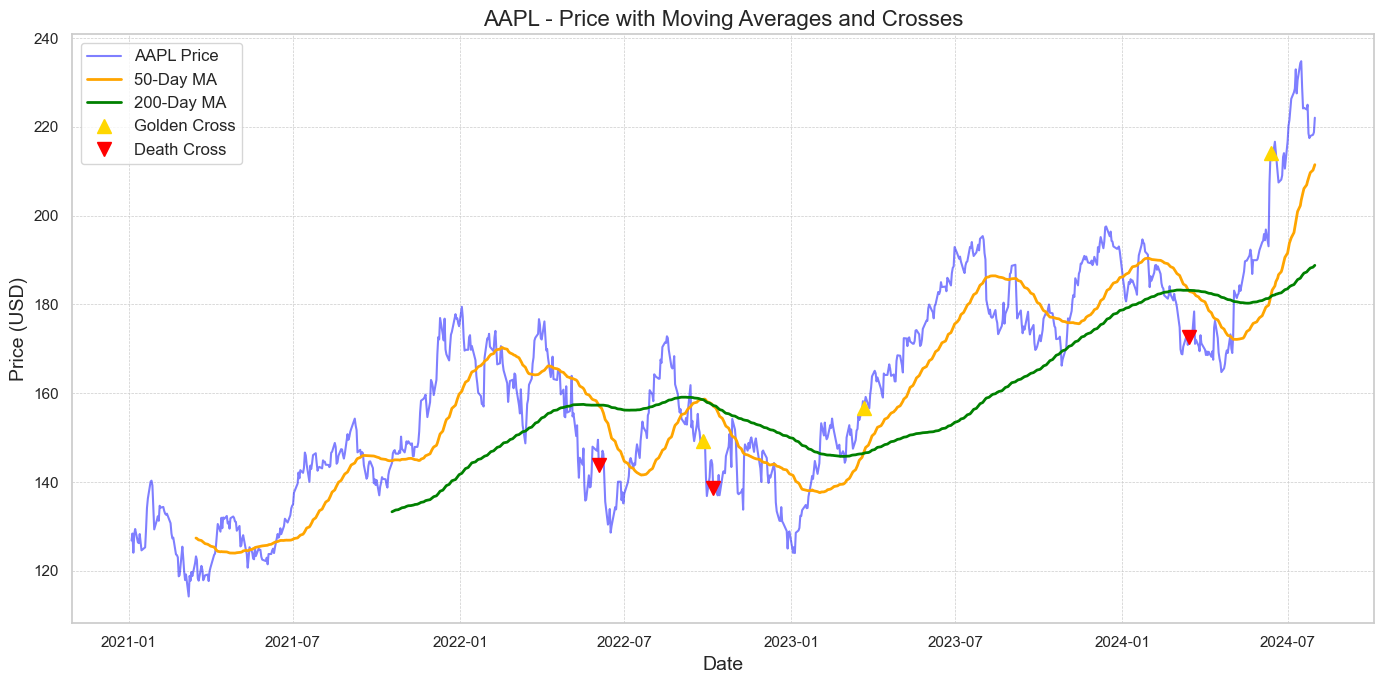

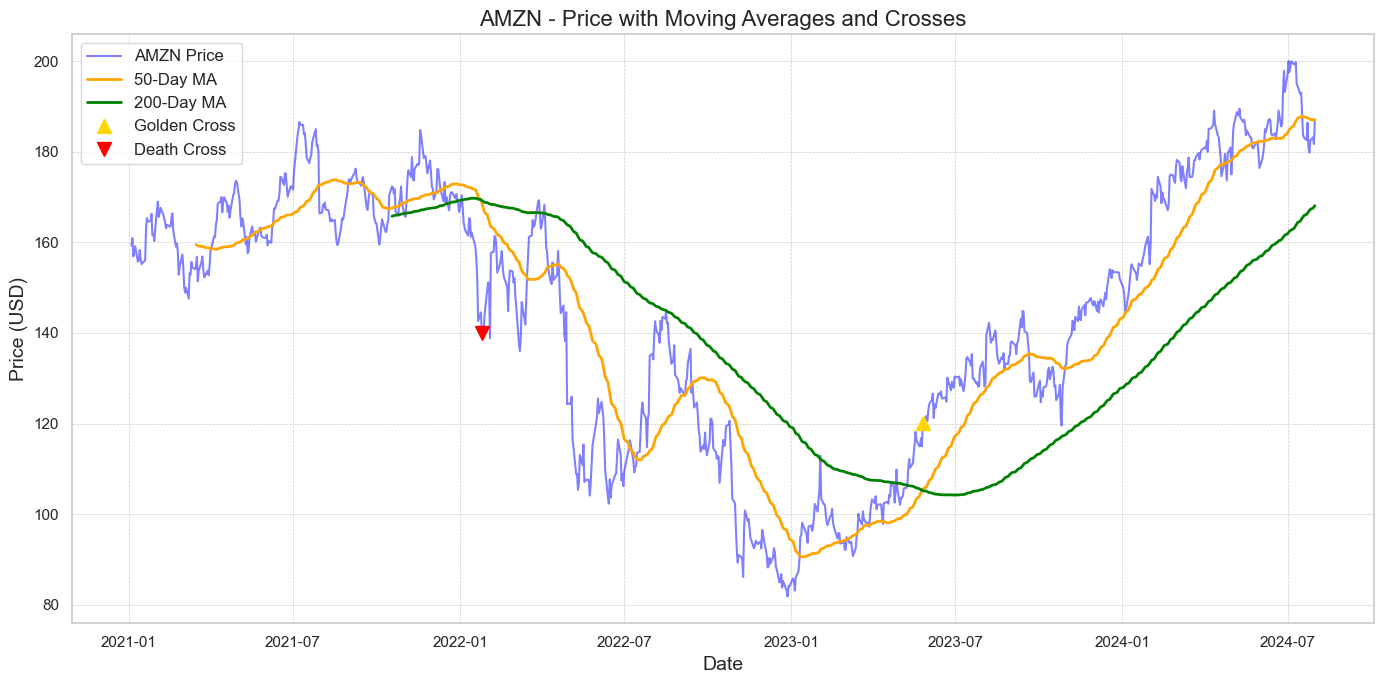

In [30]:
import matplotlib.pyplot as plt

# Function to plot with Golden Cross and Death Cross
def plot_with_crosses(ticker):
    plt.figure(figsize=(14, 7))
    
    # Plot stock price
    plt.plot(stock_data.index, stock_data[ticker], label=f'{ticker} Price', color='blue', alpha=0.5)
    
    # Plot 50-day and 200-day moving averages
    plt.plot(stock_data.index, stock_data[f'{ticker}_50_MA'], label='50-Day MA', color='orange', linewidth=2)
    plt.plot(stock_data.index, stock_data[f'{ticker}_200_MA'], label='200-Day MA', color='green', linewidth=2)
    
    # Find Golden Cross and Death Cross
    golden_cross = (stock_data[f'{ticker}_50_MA'] > stock_data[f'{ticker}_200_MA']) & \
                   (stock_data[f'{ticker}_50_MA'].shift(1) <= stock_data[f'{ticker}_200_MA'].shift(1))
    death_cross = (stock_data[f'{ticker}_50_MA'] < stock_data[f'{ticker}_200_MA']) & \
                  (stock_data[f'{ticker}_50_MA'].shift(1) >= stock_data[f'{ticker}_200_MA'].shift(1))
    
    # Plot Golden Crosses
    plt.plot(stock_data.index[golden_cross], stock_data[ticker][golden_cross], '^', markersize=10, color='gold', label='Golden Cross')
    
    # Plot Death Crosses
    plt.plot(stock_data.index[death_cross], stock_data[ticker][death_cross], 'v', markersize=10, color='red', label='Death Cross')
    
    plt.title(f'{ticker} - Price with Moving Averages and Crosses', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(loc='best', fontsize=12)
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()
    
import random

# Randomly select two tickers from the selected stocks
sample_tickers = random.sample(selected_stocks, 2)

# Plot for the selected random tickers
for ticker in sample_tickers:
    plot_with_crosses(ticker)


### Implementing Momentum Investing: Identifying Bullish Stocks Using Moving Averages and RSI"


In this section, we implemented the momentum investing strategy by focusing on key technical indicators like moving averages and the Relative Strength Index (RSI). The goal is to identify stocks that exhibit strong bullish momentum, which can indicate potential continued price growth. 

**Steps Taken:**

1. **Calculation of Moving Averages:**
   - For each stock, we calculated the 50-day and 200-day moving averages. These moving averages help in identifying the stock's trend over the short and long term. 
   - A common momentum signal is when the 50-day moving average crosses above the 200-day moving average, known as a "Golden Cross," which suggests bullish momentum.

2. **Relative Strength Index (RSI):**
   - We calculated the RSI, a momentum oscillator that measures the speed and change of price movements. RSI values between 30 and 70 are generally considered neutral, with values above 70 indicating an overbought condition, and values below 30 indicating an oversold condition. 
   - In our strategy, we screened for stocks where the RSI is less than 70, which suggests that the stock is not currently overbought and may still have room to grow.

3. **Selection of Stocks:**
   - Stocks that exhibited a 50-day moving average above their 200-day moving average and had an RSI less than 70 were selected as potential candidates for the momentum strategy.

4. **Ranking Based on 6-Month Returns:**
   - For the selected stocks, we calculated the 6-month returns (approximately 126 trading days) and ranked the stocks based on these returns.
   - The top-performing stocks based on 6-month returns were identified as the best candidates for the momentum strategy.


In [34]:
# Define your tickers and download data
tickers = all_stocks

# Initialize an empty DataFrame for momentum indicators
momentum_indicators = pd.DataFrame(index=stock_data.index)

# Function to calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

# Calculate Moving Averages and RSI for each stock
for ticker in tickers:
    stock_data[f'{ticker}_50_MA'] = stock_data[ticker].rolling(window=50).mean()
    stock_data[f'{ticker}_200_MA'] = stock_data[ticker].rolling(window=200).mean()
    stock_data[f'{ticker}_RSI'] = calculate_rsi(stock_data[ticker])

# Initialize a list to store selected stocks
selected_stocks = []

# Filter stocks based on momentum criteria
for ticker in tickers:
    if (stock_data[f'{ticker}_50_MA'] > stock_data[f'{ticker}_200_MA']).iloc[-1] and stock_data[f'{ticker}_RSI'].iloc[-1] < 70:
        selected_stocks.append(ticker)

# Calculate 6-month returns for the selected stocks
six_month_returns = stock_data[selected_stocks].pct_change(periods=126).iloc[-1]  # 126 trading days ~ 6 months

# Rank the selected stocks based on 6-month returns
ranked_momentum_stocks = six_month_returns.sort_values(ascending=False)

# Display the selected top momentum stocks
print(ranked_momentum_stocks)



Ticker
NVDA     0.864388
LLY      0.251284
ORCL     0.228933
TSLA     0.211285
META     0.189336
AAPL     0.184136
AMZN     0.175975
GOOGL    0.133876
AMGN     0.072560
MSFT     0.027631
MRK     -0.058617
Name: 2024-07-31 00:00:00, dtype: float64


### Analysis of Top Momentum Stocks

The momentum strategy identified **NVIDIA (NVDA)** as the strongest performer with an impressive 6-month return of 86.44%, indicating robust growth, likely driven by its leadership in AI and technology. **Eli Lilly (LLY)** and **Oracle (ORCL)** also showed strong returns of 25.13% and 22.89%, respectively, reflecting solid momentum in healthcare and software sectors. **Tesla (TSLA)** and **Meta (META)**, with returns of 21.13% and 18.93%, demonstrate continued strength in their respective markets. Conversely, **Merck (MRK)** exhibited a negative return, signaling weaker momentum. These insights suggest potential opportunities for investors looking to capitalize on current market trends.


### Sharpe Ratio Calculation for Each Stock

In this section, we will calculate the Sharpe Ratio for each stock. The Sharpe Ratio is a measure of risk-adjusted return, which helps investors understand how much excess return they are receiving for the extra volatility they endure by holding a riskier asset.

**Steps to Calculate the Sharpe Ratio:**

1. **Calculate Daily Returns:**  
   - First, we compute the daily returns for each stock from the adjusted closing prices.

2. **Calculate Average Daily Return and Volatility:**  
   - For each stock, we calculate the average daily return and the standard deviation of daily returns (which represents the volatility).

3. **Determine the Risk-Free Rate:**  
   - The risk-free rate represents the return on an investment with zero risk, typically approximated by government bonds. For this analysis, we'll assume a small fixed rate over the period.

4. **Compute the Sharpe Ratio:**  
   - A higher Sharpe Ratio indicates better risk-adjusted performance.

We will rank the stocks based on their Sharpe Ratios to identify which stocks offer the best risk-adjusted returns.


### Calculating the Risk-Free Rate

Before calculating the Sharpe Ratio for each stock, it's essential to determine an appropriate risk-free rate. The risk-free rate represents the return on an investment with zero risk, typically approximated by government bonds or Treasury bills. For this analysis, we use the 3-month U.S. Treasury bill (T-Bill) rate as our proxy for the risk-free rate.


In [40]:
tbill_data = yf.download('^IRX', start="2021-01-01", end="2024-08-01")['Adj Close']

# The T-Bill yield is given as an annualized rate in percentage (e.g., 0.05 = 5%)
# Convert the last available T-Bill yield to a decimal and to a daily rate
tbill_annual_rate = tbill_data.iloc[-1] / 100  # Convert percentage to decimal
risk_free_rate_daily = tbill_annual_rate / 252  # Assuming 252 trading days in a year

print(f"3-Month T-Bill Yield (annualized): {tbill_annual_rate:.4%}")
print(f"Daily Risk-Free Rate: {risk_free_rate_daily:.8%}")

[*********************100%%**********************]  1 of 1 completed

3-Month T-Bill Yield (annualized): 5.1350%
Daily Risk-Free Rate: 0.02037699%


### Sharpe Ratio

In [45]:
mean_returns = daily_returns[selected_stocks].mean()

# Calculate the daily volatility (standard deviation) for each stock
volatility = daily_returns[selected_stocks].std()


# Calculate the Sharpe Ratio for each stock
sharpe_ratios = (mean_returns - risk_free_rate_daily) / volatility

# Sort stocks by Sharpe Ratio in descending order

annual_factor = 252  # Assuming 252 trading days in a year
annualized_mean_returns = mean_returns * annual_factor
annualized_volatility = volatility * np.sqrt(annual_factor)
sharpe_ratios = (annualized_mean_returns - (risk_free_rate_daily * annual_factor)) / annualized_volatility
sorted_sharpe_ratios = sharpe_ratios.sort_values(ascending=False)


# Display the Sharpe Ratios
print("Sharpe Ratios of Momentum Stocks:")
print(sorted_sharpe_ratios)

Sharpe Ratios of Momentum Stocks:
Ticker
LLY      1.538649
NVDA     1.318435
ORCL     0.759667
MSFT     0.659683
GOOGL    0.610169
AAPL     0.524019
MRK      0.511357
AMGN     0.509301
META     0.469979
TSLA     0.182788
AMZN     0.160062
dtype: float64


The Sharpe Ratios for the selected momentum stocks indicate that **LLY (Eli Lilly)** has the highest risk-adjusted return, followed by **NVDA (NVIDIA)** and **ORCL (Oracle)**. These stocks have performed better in terms of return per unit of risk compared to the others. On the other hand, **AMZN (Amazon)** and **TSLA (Tesla)** have the lowest Sharpe Ratios, suggesting they have lower risk-adjusted returns. Generally, higher Sharpe Ratios are preferred, as they indicate better performance on a risk-adjusted basis.


### Filtering Highly Correlated Stocks

To enhance diversification, we applied a correlation filter to our momentum stocks:

1. **Correlation Matrix:** We computed the correlation matrix for the selected momentum stocks' daily returns.

2. **Threshold:** A correlation threshold of 0.6 was used. Stocks exceeding this threshold were considered too correlated.

3. **Dropping Stocks:** For each correlated pair, the stock with the lower Sharpe Ratio was removed to retain the stronger performer.

4. **Final Selection:** This process left us with a set of diversified momentum stocks, reducing risk while maintaining strong performance potential.


In [47]:
momentum_returns = daily_returns[selected_stocks]
# Set the correlation threshold

correlation_threshold = 0.6

# Calculate the correlation matrix for the stocks
correlation_matrix = momentum_returns[sorted_sharpe_ratios.index].corr()

# Initialize a set to keep track of stocks to drop
to_drop = set()

# Loop through the correlation matrix to identify pairs exceeding the threshold
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Compare Sharpe Ratios and decide which stock to drop
            stock_1 = correlation_matrix.columns[i]
            stock_2 = correlation_matrix.columns[j]
            if sorted_sharpe_ratios[stock_1] < sorted_sharpe_ratios[stock_2]:
                to_drop.add(stock_1)
            else:
                to_drop.add(stock_2)

# Filter out the stocks that are too correlated
final_stocks = [stock for stock in sorted_sharpe_ratios.index if stock not in to_drop]

print("Final Stocks after Correlation Filtering:")
print(final_stocks)


Final Stocks after Correlation Filtering:
['LLY', 'NVDA', 'ORCL', 'MRK', 'AMGN', 'TSLA']


### Final Selection of Momentum Stocks

After applying the correlation filter to ensure diversification:

- **Final Selected Stocks:** The following stocks were chosen based on their Sharpe Ratios and low correlation with each other:
  - **LLY**
  - **NVDA**
  - **ORCL**
  - **MRK**
  - **AMGN**
  - **TSLA**

These stocks are expected to offer a balanced portfolio with strong momentum and reduced correlation risk.


### Expanding Portfolio Evaluation: From Equal Weight Allocation to Mean-Variance Optimization

After initially evaluating the portfolio using an equal weight allocation strategy, where each selected stock is assigned an equal portion of the portfolio, we now move on to explore more sophisticated portfolio optimization techniques. These methods aim to enhance the portfolio's performance by adjusting the allocation weights to maximize returns while minimizing risk.

#### Key Optimization Strategies:

1. **Equal Weight Allocation:**
   - As a baseline, we started by equally distributing the portfolio's total capital among the selected momentum stocks. This approach ensures diversification but does not necessarily optimize for risk-adjusted returns.

2. **Mean-Variance Optimization:**
   - This classical portfolio optimization technique, introduced by Harry Markowitz, seeks to find the optimal weights that maximize the portfolio's expected return for a given level of risk (volatility). It balances the trade-off between return and risk by considering the mean returns of the assets and their covariance.

3. **Comparison with S&P 500:**
   - To provide context and benchmark the performance of our optimized portfolio, we will compare the results against the S&P 500 index. The S&P 500 is a widely recognized indicator of the overall market's performance, representing a broad cross-section of the U.S. economy.




In [48]:

def evaluate_portfolio(mean_returns, momentum_returns, risk_free_rate_daily, weights):
    """
    Evaluate portfolio performance metrics: Expected return, volatility, and Sharpe ratio.

    Parameters:
    mean_returns (Series): Series of mean returns for each stock.
    momentum_returns (DataFrame): DataFrame of daily returns for each stock.
    risk_free_rate_daily (float): Daily risk-free rate.
    weights (array): Array of portfolio weights.

    Returns:
    dict: Portfolio metrics including expected return, volatility, and Sharpe ratio.
    """
    # Ensure weights sum to 1
    weights = np.array(weights)
    if not np.isclose(np.sum(weights), 1):
        raise ValueError("Weights must sum to 1.")

    # Calculate the expected portfolio return (annualized)
    expected_portfolio_return = np.dot(weights, mean_returns) * 252

    # Calculate the portfolio volatility (standard deviation, annualized)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(momentum_returns.cov() * 252, weights)))

    # Calculate the portfolio Sharpe Ratio
    portfolio_sharpe_ratio = (expected_portfolio_return - risk_free_rate_daily * 252) / portfolio_volatility

    # Create a DataFrame for the portfolio
    portfolio_df = pd.DataFrame({
        'Ticker': mean_returns.index,
        'Weight': weights
    })

    # Display the portfolio
    print("Portfolio Allocation:")
    print(portfolio_df)
    print(f"\nExpected Portfolio Return: {expected_portfolio_return:.4%}")
    print(f"Portfolio Volatility: {portfolio_volatility:.4%}")
    print(f"Portfolio Sharpe Ratio: {portfolio_sharpe_ratio:.4f}")

    # Return the metrics as a dictionary
    return {
        'Expected Return': expected_portfolio_return,
        'Volatility': portfolio_volatility,
        'Sharpe Ratio': portfolio_sharpe_ratio
    }

# Number of final selected stocks
num_stocks = len(final_stocks)

# Equal weight allocation (1/number of stocks)
equal_weights = np.array([1/num_stocks] * num_stocks)

# Evaluate the portfolio using equal weights
portfolio_metrics = evaluate_portfolio(mean_returns[final_stocks], momentum_returns[final_stocks], risk_free_rate_daily, equal_weights)


Portfolio Allocation:
  Ticker    Weight
0    LLY  0.166667
1   NVDA  0.166667
2   ORCL  0.166667
3    MRK  0.166667
4   AMGN  0.166667
5   TSLA  0.166667

Expected Portfolio Return: 33.5859%
Portfolio Volatility: 21.6546%
Portfolio Sharpe Ratio: 1.3138


In [ ]:
import numpy as np
import scipy.optimize as sco


def find_mvo_weights(mean_returns, momentum_returns, risk_free_rate_daily, min_weight=0.15, max_weight=0.30):
    """
    Find the optimal portfolio weights to maximize the Sharpe Ratio using mean-variance optimization
    with minimum and maximum weight constraints.

    Parameters:
    mean_returns (Series): Series of mean returns for each stock.
    momentum_returns (DataFrame): DataFrame of daily returns for each stock.
    risk_free_rate_daily (float): Daily risk-free rate.
    min_weight (float): Minimum weight for any stock.
    max_weight (float): Maximum weight for any stock.

    Returns:
    np.array: Optimal weights for the portfolio.
    """
    def neg_sharpe(weights, mean_returns, cov_matrix, risk_free_rate):
        portfolio_return = np.dot(weights, mean_returns)
        portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
        return -(portfolio_return - risk_free_rate) / portfolio_volatility

    # Constraints: Sum of weights = 1
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

    # Bounds: Each weight must be between min_weight and max_weight
    bounds = tuple((min_weight, max_weight) for _ in range(len(mean_returns)))

    # Initial guess (equal weights)
    initial_guess = np.array(len(mean_returns) * [1. / len(mean_returns)])

    # Optimize weights to maximize Sharpe Ratio
    optimal_solution = sco.minimize(neg_sharpe, initial_guess, args=(mean_returns, momentum_returns.cov(), risk_free_rate_daily * 252),
                                    method='SLSQP', bounds=bounds, constraints=constraints)

    return optimal_solution.x

# Example usage with the final selected stocks
optimal_weights = find_mvo_weights(mean_returns[final_stocks], momentum_returns[final_stocks], risk_free_rate_daily)
print("Optimal Weights (Mean-Variance Optimization):")
print(optimal_weights)


In [ ]:
evaluate_portfolio(mean_returns[final_stocks], momentum_returns[final_stocks], risk_free_rate_daily, optimal_weights)


In [ ]:
import numpy as np
import scipy.optimize as sco

def cvar_loss(weights, returns, alpha=0.05):
    """
    Calculate the Conditional Value at Risk (CVaR) of a portfolio.

    Parameters:
    weights (array): Portfolio weights.
    returns (DataFrame): Historical returns of the portfolio assets.
    alpha (float): Significance level (typically 5% or 0.05).

    Returns:
    float: CVaR of the portfolio.
    """
    portfolio_returns = np.dot(returns, weights)
    var = np.percentile(portfolio_returns, alpha * 100)  # Value at Risk
    cvar = np.mean(portfolio_returns[portfolio_returns <= var])
    return -cvar  # Negative because we minimize in optimization

def mean_cvar_optimization(mean_returns, momentum_returns, target_return, alpha=0.05):
    """
    Optimize portfolio weights to minimize CVaR while targeting a specific expected return.

    Parameters:
    mean_returns (Series): Series of mean returns for each stock.
    momentum_returns (DataFrame): DataFrame of daily returns for each stock.
    target_return (float): Desired target return for the portfolio.
    alpha (float): Significance level for CVaR (typically 5% or 0.05).

    Returns:
    np.array: Optimal weights for the portfolio.
    """
    # Constraints: Sum of weights = 1 and portfolio return >= target_return
    constraints = [
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'ineq', 'fun': lambda x: np.dot(x, mean_returns) - target_return}
    ]

    # Bounds: Each weight must be between 0 and 1
    bounds = tuple((0, 1) for _ in range(len(mean_returns)))

    # Initial guess (equal weights)
    initial_guess = np.array(len(mean_returns) * [1. / len(mean_returns)])

    # Optimize weights to minimize CVaR
    optimal_solution = sco.minimize(cvar_loss, initial_guess, args=(momentum_returns, alpha),
                                    method='SLSQP', bounds=bounds, constraints=constraints)

    return optimal_solution.x

# Example usage with the final selected stocks
target_return = 0.02  # Example target return (1%)
optimal_weights_cvar = mean_cvar_optimization(mean_returns[final_stocks], momentum_returns[final_stocks], target_return)
print("Optimal Weights (Mean-CVaR Optimization):")
print(optimal_weights_cvar)


In [ ]:
portfolio_metrics_cvar = evaluate_portfolio(mean_returns[final_stocks], momentum_returns[final_stocks], risk_free_rate_daily, optimal_weights_cvar)


In [ ]:
mean_returns

## S&P 500

In [5]:
import yfinance as yf

# Fetch S&P 500 historical data (using SPY ETF as a proxy)
sp500 = yf.download('^GSPC', start='2021-01-01', end='2024-08-01')

# Calculate daily returns for S&P 500
sp500['Daily_Return'] = sp500['Adj Close'].pct_change()
# Calculate the expected return, volatility, and Sharpe Ratio for S&P 500
sp500_mean_return = sp500['Daily_Return'].mean()
sp500_volatility = sp500['Daily_Return'].std() * 252**0.5  # Annualize volatility
sp500_sharpe_ratio = (sp500_mean_return * 252 - risk_free_rate_daily * 252) / sp500_volatility

print(f"S&P 500 Expected Return: {sp500_mean_return * 252:.4%}")
print(f"S&P 500 Volatility: {sp500_volatility:.4%}")
print(f"S&P 500 Sharpe Ratio: {sp500_sharpe_ratio:.4f}")


[*********************100%%**********************]  1 of 1 completed


NameError: name 'risk_free_rate_daily' is not defined

In [ ]:
import matplotlib.pyplot as plt

# Calculate cumulative returns for portfolio and S&P 500
# Ensure momentum_returns contains only the stocks in final_stocks
momentum_returns_filtered = momentum_returns[final_stocks]

# Now calculate the portfolio cumulative returns with the correct dimensions
portfolio_cumulative_returns = (1 + momentum_returns_filtered.dot(optimal_weights_cvar)).cumprod()
sp500_cumulative_returns = (1 + sp500['Daily_Return']).cumprod()

# Plot the cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(portfolio_cumulative_returns, label='Portfolio')
plt.plot(sp500_cumulative_returns, label='S&P 500', linestyle='--')
plt.title('Cumulative Returns: Portfolio vs. S&P 500')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()


## OOP

In [6]:
class Asset:
    def __init__(self, symbol, price, asset_type):
        self.symbol = symbol
        self.price = price
        self.asset_type = asset_type  # 'equity' or 'bond'
        self.returns = []

    def update_price(self, new_price):
        self.price = new_price

    def calculate_return(self, previous_price):
        return (self.price - previous_price) / previous_price

class Portfolio:
    def __init__(self, initial_cash, target_allocation):
        self.cash = initial_cash
        self.positions = {}  # Dictionary to hold asset positions
        self.target_allocation = target_allocation  # {'equity': 0.7, 'bond': 0.3}
        self.value = initial_cash  # Start with cash as the portfolio's value

    def add_position(self, asset, weight):
        position_value = self.value * weight
        quantity = position_value // asset.price  # Calculate the number of shares to buy
        cost = quantity * asset.price

        if cost > self.cash:
            print(f"Not enough cash to buy {quantity} of {asset.symbol}.")
            return

        if asset.symbol in self.positions:
            self.positions[asset.symbol]['quantity'] += quantity
        else:
            self.positions[asset.symbol] = {'asset': asset, 'quantity': quantity}

        self.cash -= cost  # Deduct the cash spent

    def remove_position(self, asset, quantity):
        if asset.symbol in self.positions:
            self.positions[asset.symbol]['quantity'] -= quantity
            if self.positions[asset.symbol]['quantity'] <= 0:
                del self.positions[asset.symbol]

    def calculate_value(self):
        total_value = self.cash  # Start with the cash available
        for position in self.positions.values():
            total_value += position['asset'].price * position['quantity']  # Add the value of each position
        self.value = total_value
        return total_value  # Return the total portfolio value

    def rebalance(self):
        current_value = self.calculate_value()

        # Recalculate target allocations based on the current portfolio value
        for symbol, position in self.positions.items():
            asset = position['asset']
            target_value = current_value * self.target_allocation[asset.asset_type]
            current_position_value = asset.price * position['quantity']

            # Rebalance only if necessary and within cash constraints
            if current_position_value < target_value:
                additional_cash_needed = target_value - current_position_value
                additional_quantity = additional_cash_needed // asset.price

                # Adjust for cash availability
                if additional_quantity * asset.price > self.cash:
                    print(f"Not enough cash to rebalance {symbol}. Skipping.")
                    continue

                self.positions[symbol]['quantity'] += additional_quantity
                self.cash -= additional_quantity * asset.price

            elif current_position_value > target_value:
                excess_value = current_position_value - target_value
                quantity_to_sell = excess_value // asset.price
                self.positions[symbol]['quantity'] -= quantity_to_sell
                self.cash += quantity_to_sell * asset.price


class RebalancingStrategy:
    def __init__(self, portfolio):
        self.portfolio = portfolio

    def execute(self):
        # Periodic rebalancing logic
        self.portfolio.rebalance()


class BacktestEnvironment:
    def __init__(self, market_data, portfolio, strategy):
        self.market_data = market_data
        self.portfolio = portfolio
        self.strategy = strategy

    def run(self, start_date, end_date):
        for date in self.market_data.loc[start_date:end_date].index:
            self.update_market_prices(date)
            self.strategy.execute()
            # Log performance metrics, portfolio value, etc.
            print(f"Date: {date}, Portfolio Value: {self.portfolio.calculate_value()}")

    def update_market_prices(self, date):
        for position in self.portfolio.positions.values():
            symbol = position['asset'].symbol
            new_price = self.market_data.loc[date, symbol]
            position['asset'].update_price(new_price)


Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough cash to rebalance AAPL. Skipping.
Not enough cash to rebalance MSFT. Skipping.
Not enough

NameError: name 'plt' is not defined

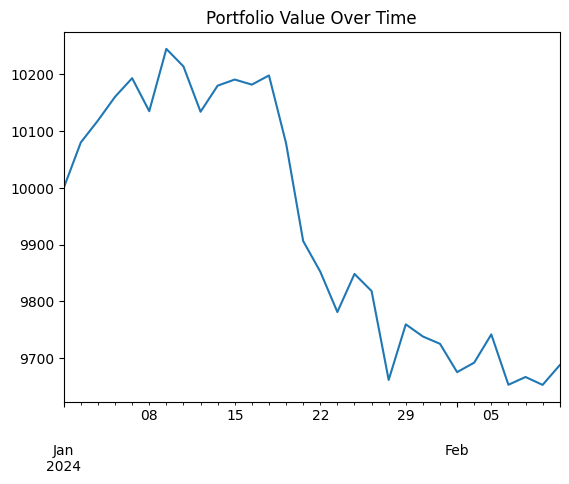

In [7]:
# Generate synthetic daily price data for each asset over a period of 30 days
np.random.seed(42)  # For reproducibility
days = 30
date_range = pd.date_range(start='2024-01-01', periods=days, freq='B')  # Business days

# Simulate daily percentage changes in prices
aapl_changes = np.random.normal(loc=0.001, scale=0.02, size=days)  # Mean daily return of 0.1%, volatility of 2%
msft_changes = np.random.normal(loc=0.001, scale=0.015, size=days)  # Mean daily return of 0.1%, volatility of 1.5%
bond_changes = np.random.normal(loc=0.0001, scale=0.001, size=days)  # Bonds are less volatile

# Generate price series
aapl_prices = 150 * np.cumprod(1 + aapl_changes)
msft_prices = 250 * np.cumprod(1 + msft_changes)
bond_prices = 1000 * np.cumprod(1 + bond_changes)

# Initialize assets
equity1 = Asset(symbol='AAPL', price=aapl_prices[0], asset_type='equity')
equity2 = Asset(symbol='MSFT', price=msft_prices[0], asset_type='equity')
bond1 = Asset(symbol='10Y_TBOND', price=bond_prices[0], asset_type='bond')

# Create a portfolio with an initial cash balance
portfolio = Portfolio(initial_cash=10000, target_allocation={'equity': 0.6, 'bond': 0.4})

# Add initial positions based on target weights
portfolio.add_position(equity1, 0.3)  # Allocate 30% of the portfolio value to AAPL
portfolio.add_position(equity2, 0.3)  # Allocate 30% of the portfolio value to MSFT
portfolio.add_position(bond1, 0.4)    # Allocate 40% of the portfolio value to 10-year Treasury Bonds

# DataFrame to track portfolio value over time
portfolio_values = pd.DataFrame(index=date_range, columns=['Portfolio Value'])

# Simulate over multiple days
for i, date in enumerate(date_range):
    # Update asset prices for the day
    equity1.update_price(aapl_prices[i])
    equity2.update_price(msft_prices[i])
    bond1.update_price(bond_prices[i])

    # Rebalance the portfolio to maintain the target allocation
    portfolio.rebalance()

    # Calculate the portfolio value and store it
    portfolio_values.loc[date] = portfolio.calculate_value()

# Print the portfolio values over time
print(portfolio_values)

# Calculate overall return at the end of the period
initial_value = portfolio_values.iloc[0]['Portfolio Value']
final_value = portfolio_values.iloc[-1]['Portfolio Value']
portfolio_return = (final_value - initial_value) / initial_value
print(f"Portfolio Return after {days} days: {portfolio_return:.2%}")

# Plot the portfolio value over time
portfolio_values.plot(title="Portfolio Value Over Time", legend=False)
plt.ylabel("Portfolio Value ($)")
plt.xlabel("Date")
plt.show()

## RL

In [8]:
import numpy as np

class RLAgent:
    def __init__(self, action_space, learning_rate=0.1, discount_factor=0.95, exploration_rate=1.0, exploration_decay=0.995, min_exploration_rate=0.01):
        self.action_space = action_space  # Possible actions the agent can take
        self.q_table = {}  # Initialize Q-table for Q-learning
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.exploration_decay = exploration_decay
        self.min_exploration_rate = min_exploration_rate

    def choose_action(self, state):
        # Convert state to a tuple (since numpy arrays aren't hashable for dictionary keys)
        state = tuple(state)

        # Epsilon-greedy action selection
        if np.random.random() < self.exploration_rate:
            action = np.random.choice(self.action_space)
        else:
            # Exploit: choose the best known action for the given state
            if state not in self.q_table:
                self.q_table[state] = np.zeros(len(self.action_space))
            action = np.argmax(self.q_table[state])
        return action

    def learn(self, state, action, reward, next_state):
        # Convert states to tuples
        state = tuple(state)
        next_state = tuple(next_state)

        # Initialize Q-values if state-action pair not in Q-table
        if state not in self.q_table:
            self.q_table[state] = np.zeros(len(self.action_space))
        if next_state not in self.q_table:
            self.q_table[next_state] = np.zeros(len(self.action_space))

        # Q-learning update rule
        best_next_action = np.argmax(self.q_table[next_state])
        td_target = reward + self.discount_factor * self.q_table[next_state][best_next_action]
        td_delta = td_target - self.q_table[state][action]
        self.q_table[state][action] += self.learning_rate * td_delta

        # Decay the exploration rate
        self.exploration_rate = max(self.min_exploration_rate, self.exploration_rate * self.exploration_decay)


In [9]:
class RLEnvironment:
    def __init__(self, portfolio, market_data, agent, fixed_cost=1.0, variable_cost=0.001):
        self.portfolio = portfolio
        self.market_data = market_data
        self.agent = agent
        self.current_step = 0
        self.previous_value = self.portfolio.calculate_value()  # Track previous portfolio value
        self.fixed_cost = fixed_cost  # Fixed cost per trade (e.g., $1 per trade)
        self.variable_cost = variable_cost  # Variable cost (e.g., 0.1% of the trade value)
        self.transaction_costs = 0


    def get_state(self):
        # Add more features to the state representation
        portfolio_value = self.portfolio.calculate_value()
        allocations = [self.portfolio.positions[symbol]['quantity'] * self.portfolio.positions[symbol]['asset'].price / portfolio_value for symbol in self.portfolio.positions]
        market_prices = [self.portfolio.positions[symbol]['asset'].price for symbol in self.portfolio.positions]
        # Example: Add moving averages or other indicators
        ma_5 = np.mean(market_prices[-5:]) if len(market_prices) >= 5 else market_prices[-1]
        ma_10 = np.mean(market_prices[-10:]) if len(market_prices) >= 10 else market_prices[-1]
        state = allocations + market_prices + [ma_5, ma_10]
        return np.array(state)


    def calculate_transaction_costs(self, action, quantity, price):
        # Calculate the cost of the transaction
        fixed_cost = self.fixed_cost if action in [1, 2] else 0  # Apply fixed cost only on buy or sell actions
        variable_cost = self.variable_cost * quantity * price
        transaction_cost = fixed_cost + variable_cost
        self.transaction_costs += transaction_cost  # Accumulate total transaction costs


    def step(self):
        state = self.get_state()
        action = self.agent.choose_action(state)
        self.apply_action(action)
        self.current_step += 1
        if self.current_step < len(self.market_data.index):
            self.update_market_prices(self.market_data.index[self.current_step])
        next_state = self.get_state()
        reward = self.calculate_reward(next_state)
        self.agent.learn(state, action, reward, next_state)
        done = self.current_step >= len(self.market_data.index) - 1
        return next_state, reward, done

    def apply_action(self, action):
        if action == 0:  # Hold
            pass
        elif action == 1:  # Rebalance
            for symbol, position in self.portfolio.positions.items():
                quantity_to_adjust = self.portfolio.target_allocation[position['asset'].asset_type] * self.portfolio.calculate_value() / position['asset'].price - position['quantity']
                if quantity_to_adjust > 0:
                    self.calculate_transaction_costs(action, quantity_to_adjust, position['asset'].price)
                    self.portfolio.add_position(position['asset'], quantity_to_adjust)
                elif quantity_to_adjust < 0:
                    self.calculate_transaction_costs(action, -quantity_to_adjust, position['asset'].price)
                    self.portfolio.remove_position(position['asset'], -quantity_to_adjust)
        # Add other actions (e.g., buy, sell) as needed

    def update_market_prices(self, date):
        for asset in self.portfolio.positions.values():
            new_price = self.market_data.loc[date, asset['asset'].symbol]
            asset['asset'].update_price(new_price)

    def calculate_reward(self, state):
        current_value = self.portfolio.calculate_value()
        transaction_costs = self.calculate_transaction_costs()
        reward = (current_value - transaction_costs) - self.previous_value
        self.previous_value = current_value - transaction_costs
        return reward


    def log_decision(self, state, action, reward, next_state):
        print(f"Step {self.current_step}:")
        print(f"  State: {state}")
        print(f"  Action Taken: {action}")
        print(f"  Portfolio Value: {self.portfolio.calculate_value():.2f}")
        print(f"  Reward: {reward:.2f}")
        print(f"  Next State: {next_state}")
        print("-" * 30)


In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the Portfolio, Asset, RLAgent, and RLEnvironment classes are already defined

# Initialize assets
equity1 = Asset(symbol='AAPL', price=150, asset_type='equity')
equity2 = Asset(symbol='MSFT', price=250, asset_type='equity')
bond1 = Asset(symbol='10Y_TBOND', price=1000, asset_type='bond')

# Create a portfolio with an initial cash balance
portfolio = Portfolio(initial_cash=10000, target_allocation={'equity': 0.6, 'bond': 0.4})

# Add initial positions based on target weights
portfolio.add_position(equity1, 0.3)  # Allocate 30% of the portfolio value to AAPL
portfolio.add_position(equity2, 0.3)  # Allocate 30% of the portfolio value to MSFT
portfolio.add_position(bond1, 0.4)    # Allocate 40% of the portfolio value to 10-year Treasury Bonds

# Initialize the RL agent
action_space = [0, 1]  # Example: 0 for hold, 1 for rebalance
rl_agent = RLAgent(action_space)

# Simulate market data (as before)
days = 30
date_range = pd.date_range(start='2024-01-01', periods=days, freq='B')
aapl_changes = np.random.normal(loc=0.001, scale=0.02, size=days)
msft_changes = np.random.normal(loc=0.001, scale=0.015, size=days)
bond_changes = np.random.normal(loc=0.0001, scale=0.001, size=days)
aapl_prices = 150 * np.cumprod(1 + aapl_changes)
msft_prices = 250 * np.cumprod(1 + msft_changes)
bond_prices = 1000 * np.cumprod(1 + bond_changes)

# Combine into a DataFrame
market_data = pd.DataFrame({
    'AAPL': aapl_prices,
    'MSFT': msft_prices,
    '10Y_TBOND': bond_prices
}, index=date_range)

# Initialize the RL environment
rl_environment = RLEnvironment(portfolio, market_data, rl_agent)

# List to store the results of each episode
final_portfolio_values = []

# Run multiple simulations (episodes)
for episode in range(100):  # Run more episodes to allow the agent to learn
    print(f"Starting episode {episode + 1}")
    rl_agent.exploration_rate = 1.0  # Reset exploration rate at the start of each episode
    rl_environment.current_step = 0  # Reset the environment
    rl_environment.previous_value = portfolio.calculate_value()  # Track previous portfolio value
    done = False
    while not done:
        next_state, reward, done = rl_environment.step()
        rl_environment.previous_value = portfolio.calculate_value()  # Update previous value

    # Store the final portfolio value for this episode
    final_value = portfolio.calculate_value()
    final_portfolio_values.append(final_value)
    print(f"End of episode {episode + 1}. Final Portfolio Value: {final_value}")

# After all episodes, analyze the results
final_portfolio_values = np.array(final_portfolio_values)
average_final_value = np.mean(final_portfolio_values)
max_final_value = np.max(final_portfolio_values)
min_final_value = np.min(final_portfolio_values)

print("\nPerformance over 100 episodes:")
print(f"Average Final Portfolio Value: {average_final_value:.2f}")
print(f"Max Final Portfolio Value: {max_final_value:.2f}")
print(f"Min Final Portfolio Value: {min_final_value:.2f}")

# Plot the distribution of final portfolio values
plt.hist(final_portfolio_values, bins=20, edgecolor='black')
plt.title("Distribution of Final Portfolio Values After 100 Episodes")
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Frequency")
plt.show()


Starting episode 1


TypeError: RLEnvironment.calculate_transaction_costs() missing 3 required positional arguments: 'action', 'quantity', and 'price'

In [11]:
# Assuming the Portfolio, Asset, RLAgent, and RLEnvironment classes are already defined

# Initialize the RL agent
action_space = [0, 1]  # Example: 0 for hold, 1 for rebalance
rl_agent = RLAgent(action_space)

# List to store the results of each episode
final_portfolio_values = []

# Run multiple simulations (episodes)
for episode in range(500):  # Run more episodes to allow the agent to learn
    print(f"Starting episode {episode + 1}")

    # Reinitialize the portfolio and market data for each episode to ensure a fresh start
    equity1 = Asset(symbol='AAPL', price=150, asset_type='equity')
    equity2 = Asset(symbol='MSFT', price=250, asset_type='equity')
    bond1 = Asset(symbol='10Y_TBOND', price=1000, asset_type='bond')

    portfolio = Portfolio(initial_cash=10000, target_allocation={'equity': 0.6, 'bond': 0.4})
    portfolio.add_position(equity1, 0.3)  # Allocate 30% of the portfolio value to AAPL
    portfolio.add_position(equity2, 0.3)  # Allocate 30% of the portfolio value to MSFT
    portfolio.add_position(bond1, 0.4)    # Allocate 40% of the portfolio value to 10-year Treasury Bonds

    # Reset the exploration rate and environment for each episode
    rl_agent.exploration_rate = 1.0  # Reset exploration rate at the start of each episode
    rl_environment = RLEnvironment(portfolio, market_data, rl_agent)
    rl_environment.current_step = 0  # Reset the environment's step counter
    rl_environment.previous_value = portfolio.calculate_value()  # Reset the previous portfolio value

    done = False
    while not done:
        next_state, reward, done = rl_environment.step()
        rl_environment.previous_value = portfolio.calculate_value()  # Update previous value

    # Store the final portfolio value for this episode
    final_value = portfolio.calculate_value()
    final_portfolio_values.append(final_value)
    print(f"End of episode {episode + 1}. Final Portfolio Value: {final_value}")

# After all episodes, analyze the results
final_portfolio_values = np.array(final_portfolio_values)
average_final_value = np.mean(final_portfolio_values)
max_final_value = np.max(final_portfolio_values)
min_final_value = np.min(final_portfolio_values)

print("\nPerformance over 100 episodes:")
print(f"Average Final Portfolio Value: {average_final_value:.2f}")
print(f"Max Final Portfolio Value: {max_final_value:.2f}")
print(f"Min Final Portfolio Value: {min_final_value:.2f}")

# Plot the distribution of final portfolio values
plt.hist(final_portfolio_values, bins=20, edgecolor='black')
plt.title("Distribution of Final Portfolio Values After 100 Episodes")
plt.xlabel("Final Portfolio Value ($)")
plt.ylabel("Frequency")
plt.show()


Starting episode 1
Not enough cash to buy 1333.0 of AAPL.
Not enough cash to buy 480.0 of MSFT.


TypeError: RLEnvironment.calculate_transaction_costs() missing 3 required positional arguments: 'action', 'quantity', and 'price'

In [12]:
class Portfolio:
    def __init__(self, initial_cash, target_allocation):
        self.cash = initial_cash
        self.positions = {}  # Dictionary to hold asset positions
        self.target_allocation = target_allocation  # {'equity': 0.7, 'bond': 0.3}
        self.value = initial_cash  # Start with cash as the portfolio's value

    def add_position(self, asset, quantity):
        cost = quantity * asset.price
        if cost > self.cash:
            print(f"Not enough cash to buy {quantity} of {asset.symbol}. Only {self.cash} available.")
            quantity = self.cash // asset.price  # Adjust quantity to buy only what cash allows
            cost = quantity * asset.price

        if asset.symbol in self.positions:
            self.positions[asset.symbol]['quantity'] += quantity
        else:
            self.positions[asset.symbol] = {'asset': asset, 'quantity': quantity}

        self.cash -= cost  # Deduct the cash spent

    def remove_position(self, asset, quantity):
        if asset.symbol in self.positions:
            self.positions[asset.symbol]['quantity'] -= quantity
            if self.positions[asset.symbol]['quantity'] <= 0:
                del self.positions[asset.symbol]
            self.cash += quantity * asset.price  # Add the cash gained from selling

    def calculate_value(self):
        total_value = self.cash  # Start with the cash available
        for position in self.positions.values():
            total_value += position['asset'].price * position['quantity']  # Add the value of each position
        self.value = total_value
        return total_value  # Return the total portfolio value

    def rebalance(self):
        current_value = self.calculate_value()

        # Determine the target value for each asset type
        target_values = {asset_type: current_value * target_weight for asset_type, target_weight in self.target_allocation.items()}

        # First, sell over-weighted assets to generate cash
        for symbol, position in self.positions.items():
            asset = position['asset']
            current_position_value = asset.price * position['quantity']
            target_value = target_values[asset.asset_type]

            if current_position_value > target_value:
                # Calculate how much to sell
                quantity_to_sell = (current_position_value - target_value) // asset.price
                self.remove_position(asset, quantity_to_sell)

        # Then, use the cash to buy under-weighted assets, ensuring we never overspend
        for symbol, position in self.positions.items():
            asset = position['asset']
            current_position_value = asset.price * position['quantity']
            target_value = target_values[asset.asset_type]

            if current_position_value < target_value:
                additional_quantity = (target_value - current_position_value) // asset.price

                # Ensure we never overspend
                if additional_quantity * asset.price <= self.cash:
                    self.add_position(asset, additional_quantity)
                else:
                    print(f"Not enough cash to fully rebalance {symbol}. Buying only what is affordable.")
                    affordable_quantity = self.cash // asset.price
                    if affordable_quantity > 0:
                        self.add_position(asset, affordable_quantity)

        # Recalculate portfolio value after rebalancing
        self.calculate_value()



In [13]:

class RLEnvironment:
    def __init__(self, portfolio, market_data, agent, fixed_cost=1.0, variable_cost=0.001):
        self.portfolio = portfolio
        self.market_data = market_data
        self.agent = agent
        self.current_step = 0
        self.previous_value = self.portfolio.calculate_value()  # Track previous portfolio value
        self.fixed_cost = fixed_cost  # Fixed cost per trade (e.g., $1 per trade)
        self.variable_cost = variable_cost  # Variable cost (e.g., 0.1% of the trade value)
        self.transaction_costs = 0

    def calculate_transaction_costs(self, action, quantity, price):
        # Calculate the cost of the transaction
        fixed_cost = self.fixed_cost if action in [1, 2] else 0  # Apply fixed cost only on buy or sell actions
        variable_cost = self.variable_cost * quantity * price
        transaction_cost = fixed_cost + variable_cost
        self.transaction_costs += transaction_cost  # Accumulate total transaction costs
        return transaction_cost

    # Inside the RLEnvironment class
    def apply_action(self, action):
        if action == 0:  # Hold
            pass
        elif action == 1:  # Rebalance
            for symbol, position in list(self.portfolio.positions.items()):
                target_quantity = self.portfolio.target_allocation[position['asset'].asset_type] * self.portfolio.calculate_value() / position['asset'].price
                quantity_to_adjust = target_quantity - position['quantity']

                if quantity_to_adjust > 0:
                    cost = self.calculate_transaction_costs(action, quantity_to_adjust, position['asset'].price)

                    # Ensure there's enough cash to make the purchase
                    if cost > self.portfolio.cash:
                        print(f"Skipping purchase for {symbol} due to insufficient funds.")
                        continue

                    self.portfolio.add_position(position['asset'], quantity_to_adjust)
                    self.portfolio.cash -= cost

                elif quantity_to_adjust < 0:
                    revenue = self.calculate_transaction_costs(action, -quantity_to_adjust, position['asset'].price)
                    self.portfolio.remove_position(position['asset'], -quantity_to_adjust)
                    self.portfolio.cash += revenue

    def calculate_reward(self, state):
        current_value = self.portfolio.calculate_value()
        reward = (current_value - self.transaction_costs) - self.previous_value
        self.previous_value = current_value - self.transaction_costs
        return reward

    def get_state(self):
        portfolio_value = self.portfolio.calculate_value()
        allocations = [
            self.portfolio.positions[symbol]['quantity'] * self.portfolio.positions[symbol]['asset'].price / portfolio_value
            for symbol in self.portfolio.positions
        ]
        market_prices = [self.portfolio.positions[symbol]['asset'].price for symbol in self.portfolio.positions]

        # Calculate moving averages, ensuring there are enough data points
        if len(market_prices) >= 5:
            ma_5 = np.mean(market_prices[-5:])
        else:
            ma_5 = np.mean(market_prices)  # Use whatever data is available

        if len(market_prices) >= 10:
            ma_10 = np.mean(market_prices[-10:])
        else:
            ma_10 = np.mean(market_prices)  # Use whatever data is available

        state = allocations + market_prices + [ma_5, ma_10]
        return np.array(state)

    def update_market_prices(self, date):
        for symbol, position in self.portfolio.positions.items():
            new_price = self.market_data.loc[date, symbol]
            if new_price <= 0:
                print(f"Invalid price detected for {symbol} on {date}: {new_price}. Skipping update.")
                continue
            position['asset'].update_price(new_price)

    def step(self):
        state = self.get_state()
        action = self.agent.choose_action(state)
        self.apply_action(action)
        self.current_step += 1
        if self.current_step < len(self.market_data.index):
            self.update_market_prices(self.market_data.index[self.current_step])
        next_state = self.get_state()
        reward = self.calculate_reward(next_state)
        self.agent.learn(state, action, reward, next_state)
        done = self.current_step >= len(self.market_data.index) - 1
        return next_state, reward, done


In [ ]:
import numpy as np
import pandas as pd

# Initialize more assets
equity1 = Asset(symbol='AAPL', price=150, asset_type='equity')
equity2 = Asset(symbol='MSFT', price=250, asset_type='equity')
equity3 = Asset(symbol='GOOGL', price=2800, asset_type='equity')
bond1 = Asset(symbol='10Y_TBOND', price=1000, asset_type='bond')
bond2 = Asset(symbol='5Y_TBOND', price=500, asset_type='bond')

# Create a more diversified Portfolio with initial cash of $50,000
portfolio = Portfolio(initial_cash=50000, target_allocation={'equity': 0.7, 'bond': 0.3})

# Add initial positions to the portfolio
portfolio.add_position(equity1, 0.2)  # 20% allocation to AAPL
portfolio.add_position(equity2, 0.2)  # 20% allocation to MSFT
portfolio.add_position(equity3, 0.3)  # 30% allocation to GOOGL
portfolio.add_position(bond1, 0.2)    # 20% allocation to 10Y_TBOND
portfolio.add_position(bond2, 0.1)    # 10% allocation to 5Y_TBOND

# Define a more dynamic rebalancing strategy
strategy = RebalancingStrategy(portfolio)

# Simulate more complex market data over a longer period (60 days)
dates = pd.date_range(start='2024-01-01', periods=60, freq='B')
aapl_prices = np.random.normal(loc=150, scale=5, size=len(dates))
msft_prices = np.random.normal(loc=250, scale=8, size=len(dates))
googl_prices = np.random.normal(loc=2800, scale=50, size=len(dates))
bond1_prices = np.random.normal(loc=1000, scale=10, size=len(dates))
bond2_prices = np.random.normal(loc=500, scale=5, size=len(dates))

market_data = pd.DataFrame({
    'AAPL': aapl_prices,
    'MSFT': msft_prices,
    'GOOGL': googl_prices,
    '10Y_TBOND': bond1_prices,
    '5Y_TBOND': bond2_prices
}, index=dates)

# Create a backtesting environment and run the simulation
environment = BacktestEnvironment(market_data, portfolio, strategy)
environment.run(start_date='2024-01-01', end_date='2024-03-25')

# Print final portfolio value and cash
print(f"Final Portfolio Value: {portfolio.calculate_value():.2f}")
print(f"Final Cash: {portfolio.cash:.2f}")


Not enough cash to fully rebalance MSFT. Buying only what is affordable.
Not enough cash to fully rebalance GOOGL. Buying only what is affordable.
Not enough cash to fully rebalance 10Y_TBOND. Buying only what is affordable.
Not enough cash to fully rebalance 5Y_TBOND. Buying only what is affordable.
Date: 2024-01-01 00:00:00, Portfolio Value: 49993.35828927922
Not enough cash to fully rebalance MSFT. Buying only what is affordable.
Not enough cash to fully rebalance GOOGL. Buying only what is affordable.
Not enough cash to fully rebalance 10Y_TBOND. Buying only what is affordable.
Not enough cash to fully rebalance 5Y_TBOND. Buying only what is affordable.
Date: 2024-01-02 00:00:00, Portfolio Value: 53283.39689850359
Not enough cash to fully rebalance MSFT. Buying only what is affordable.
Not enough cash to fully rebalance GOOGL. Buying only what is affordable.
Not enough cash to fully rebalance 10Y_TBOND. Buying only what is affordable.
Not enough cash to fully rebalance 5Y_TBOND. Bu

In [90]:
class TradingEnvironment:
    def __init__(self, market_data, initial_cash, trading_cost=0.001, interest_rate=0.02/252):
        self.market_data = market_data
        self.initial_cash = initial_cash
        self.trading_cost = trading_cost
        self.interest_rate = interest_rate
        self.current_step = 0
        self.portfolio_value = initial_cash
        self.previous_portfolio_value = initial_cash
        self.positions = {}  # Dictionary to hold asset positions (e.g., {'AAPL': 50, 'MSFT': 30})
        self.cash = initial_cash
        self.done = False

    def reset(self):
        self.current_step = 0
        self.portfolio_value = self.initial_cash
        self.previous_portfolio_value = self.initial_cash
        self.positions = {}
        self.cash = self.initial_cash

        # Initialize the portfolio with a simple equal-weight distribution
        num_assets = len(self.market_data.columns)
        equal_weight = 1 / (num_assets + 1)
        for symbol in self.market_data.columns:
            initial_value = equal_weight * self.portfolio_value
            quantity = initial_value // self.market_data[symbol].iloc[self.current_step]
            self.positions[symbol] = quantity
            self.cash -= quantity * self.market_data[symbol].iloc[self.current_step]

        return self._get_observation()

    def step(self, action):
        # Apply the action (reallocate the portfolio)
        self._execute_action(action)

        # Move to the next step in the market data
        self.current_step += 1

        if self.current_step >= len(self.market_data) - 1:
            self.done = True

        # Update previous portfolio value
        self.previous_portfolio_value = self.portfolio_value

        # Calculate the portfolio value after taking the action
        self.portfolio_value = self._calculate_portfolio_value()

        # Get the new state and calculate the reward
        state = self._get_observation()
        reward = self._calculate_reward()

        return state, reward, self.done
    def _get_observation(self):
        current_prices = self.market_data.iloc[self.current_step].values
        weights = self._calculate_weights()
        return np.concatenate((current_prices, weights), axis=None)


    def _calculate_weights(self):
        total_value = self._calculate_portfolio_value()
        weights = []
        for symbol, quantity in self.positions.items():
            weight = (quantity * self.market_data[symbol].iloc[self.current_step]) / total_value
            weights.append(weight)
        weights.append(self.cash / total_value)
        return np.array(weights)

    def _calculate_portfolio_value(self):
        value = self.cash
        for symbol, quantity in self.positions.items():
            value += quantity * self.market_data[symbol].iloc[self.current_step]
        return value

    def _calculate_reward(self):
        reward = (self.portfolio_value - self.previous_portfolio_value) / self.previous_portfolio_value
        return reward

    def _execute_action(self, action):
        num_assets = len(self.market_data.columns)

        if isinstance(action, int):
            # Handle discrete action space (e.g., 0: do nothing, 1: rebalance, 2: sell all, etc.)
            if action == 0:
                # Do nothing (hold)
                pass
            elif action == 1:
                # Rebalance to equal weights (including cash)
                equal_weight = 1 / (num_assets + 1)
                self._rebalance_portfolio(equal_weight)
            elif action == 2:
                # Sell all positions and hold cash
                self._sell_all()

        else:
            raise TypeError("Expected action to be an integer representing a discrete choice.")

    def _rebalance_portfolio(self, equal_weight):
        new_positions = {}
        self.cash = self.portfolio_value

        for symbol in self.market_data.columns:
            target_value = equal_weight * self.portfolio_value
            quantity = target_value // self.market_data[symbol].iloc[self.current_step]
            cost = quantity * self.market_data[symbol].iloc[self.current_step]
            new_positions[symbol] = quantity
            self.cash -= cost

        self.positions = new_positions

    def _sell_all(self):
        self.cash = self._calculate_portfolio_value()
        self.positions = {}


In [91]:
class RLAgent:
    def __init__(self, action_space, learning_rate=0.01):
        self.action_space = action_space  # The space of possible actions (e.g., portfolio weights)
        self.learning_rate = learning_rate
        self.policy = self._build_policy_network()

    def _build_policy_network(self):
        # A simple neural network could be used here to approximate the policy
        # For simplicity, we'll use a random policy for now
        return lambda state: np.random.dirichlet(np.ones(len(self.action_space)), size=1).flatten()

    def choose_action(self, state):
        # Choose an action based on the current state
        action = self.policy(state)
        return action

    def learn(self, state, action, reward, next_state):
        # Implement learning rule (e.g., policy gradient or Q-learning)
        pass


import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow as tf
from tensorflow.keras import layers, models

import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
class RLAgent:
    def __init__(self, state_size, action_space, learning_rate=0.01):
        self.state_size = state_size
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.policy = self._build_policy_network()

    def _build_policy_network(self):
        model = models.Sequential([
            layers.Dense(24, input_dim=self.state_size, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_space, activation='softmax')  # Adjusted for the action space
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss='categorical_crossentropy')
        return model

    def choose_action(self, state):
        print(f"State shape: {state.shape}")  # Debugging state shape
        action_probs = self.policy.predict(state[np.newaxis, :])
        action = np.argmax(action_probs)
        return int(action)

    def learn(self, state, action, reward, next_state):
        action_one_hot = np.zeros(self.action_space)
        action_one_hot[action] = 1
        reward = np.array([reward])
        self.policy.fit(state[np.newaxis, :], action_one_hot[np.newaxis, :], sample_weight=reward, verbose=0)


In [92]:
# Define your market data (as done previously)
market_data = pd.DataFrame({
    'AAPL': np.random.normal(loc=150, scale=5, size=252),
    'MSFT': np.random.normal(loc=250, scale=10, size=252),
    'GOOGL': np.random.normal(loc=1000, scale=20, size=252)
})
# Example simulation loop
state_size = 7

env = TradingEnvironment(market_data=market_data, initial_cash=10000)
n_assets = 3
state_size = 2 * n_assets + 1  # Current prices + weights + cash
agent = RLAgent(state_size=state_size, action_space=3)  # 3 discrete actions (hold, rebalance, sell)


for episode in range(num_episodes):
    print(f"Starting episode {episode + 1}")
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        print(f"Action taken: {action}")  # Debugging action
        next_state, reward, done = env.step(action)
        print(f"Reward received: {reward}")  # Debugging reward
        agent.learn(state, action, reward, next_state)
        state = next_state
    print(f"End of episode {episode + 1}. Final Portfolio Value: {env.portfolio_value}")



Starting episode 1
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
Action taken: 0
Reward received: 0.014919808497439227
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Action taken: 0
Reward received: -0.03244229805322017
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Action taken: 0
Reward received: 0.030259584459272487
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Action taken: 0
Reward received: -0.016772157188791777
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Action taken: 0
Reward received: -0.0008551651003754335
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Action taken: 0
Reward received: 0.009737830520683829
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Action taken: 0
Reward received: -0.019734629578842176
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Action taken: 0
Reward received: 0.01841795228408265
State shape: (7,)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Action taken: 0
Reward received: 0.005953

In [ ]:
import numpy as np

class RLAgent:
    def __init__(self, state_size, action_space, learning_rate=0.01, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = state_size
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.policy = self._build_policy_network()

    def _build_policy_network(self):
        model = models.Sequential([
            layers.Dense(24, input_dim=self.state_size, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_space, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss='categorical_crossentropy')
        return model

    def choose_action(self, state):
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_space)  # Explore: random action
        action_probs = self.policy.predict(state[np.newaxis, :])
        action = np.argmax(action_probs)
        return int(action)

    def learn(self, state, action, reward, next_state):
        action_one_hot = np.zeros(self.action_space)
        action_one_hot[action] = 1
        reward = np.array([reward])
        self.policy.fit(state[np.newaxis, :], action_one_hot[np.newaxis, :], sample_weight=reward, verbose=0)

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay




In [101]:
import numpy as np

class TradingEnvironment:
    def __init__(self, market_data, initial_cash, trading_cost=0.001, interest_rate=0.02/252, risk_free_rate=0.01/252):
        self.market_data = market_data
        self.initial_cash = initial_cash
        self.trading_cost = trading_cost
        self.interest_rate = interest_rate
        self.risk_free_rate = risk_free_rate  # Adding the risk-free rate attribute
        self.current_step = 0
        self.portfolio_value = initial_cash
        self.previous_portfolio_value = initial_cash
        self.portfolio_value_history = [initial_cash]
        self.positions = {}  # Dictionary to hold asset positions (e.g., {'AAPL': 50, 'MSFT': 30})
        self.cash = initial_cash
        self.done = False

    def reset(self):
        self.current_step = 0
        self.portfolio_value = self.initial_cash
        self.previous_portfolio_value = self.initial_cash
        self.portfolio_value_history = [self.initial_cash]
        self.positions = {}
        self.cash = self.initial_cash

        # Initialize the portfolio with a simple equal-weight distribution
        num_assets = len(self.market_data.columns)
        equal_weight = 1 / (num_assets + 1)
        for symbol in self.market_data.columns:
            initial_value = equal_weight * self.portfolio_value
            quantity = initial_value // self.market_data[symbol].iloc[self.current_step]
            self.positions[symbol] = quantity
            self.cash -= quantity * self.market_data[symbol].iloc[self.current_step]

        return self._get_observation()

    def step(self, action):
        self._execute_action(action)

        self.current_step += 1

        if self.current_step >= len(self.market_data) - 1:
            self.done = True

        self.previous_portfolio_value = self.portfolio_value

        self.portfolio_value = self._calculate_portfolio_value()

        self.portfolio_value_history.append(self.portfolio_value)

        state = self._get_observation()
        reward = self._calculate_sharpe_ratio_reward()

        return state, reward, self.done


    def _get_observation(self):
        current_prices = self.market_data.iloc[self.current_step].values
        weights = self._calculate_weights()

        # Ensure state size is always 7
        state = np.concatenate((current_prices, weights), axis=None)
        if state.shape[0] < 7:
            state = np.pad(state, (0, 7 - state.shape[0]), 'constant')

        return state


    def _calculate_weights(self):
        total_value = self._calculate_portfolio_value()
        weights = []
        for symbol, quantity in self.positions.items():
            weight = (quantity * self.market_data[symbol].iloc[self.current_step]) / total_value
            weights.append(weight)
        weights.append(self.cash / total_value)
        return np.array(weights)

    def _calculate_portfolio_value(self):
        value = self.cash
        for symbol, quantity in self.positions.items():
            value += quantity * self.market_data[symbol].iloc[self.current_step]
        return value

    def _calculate_sharpe_ratio_reward(self):
        # Calculate the returns as the percentage change in portfolio value
        returns = np.diff(self.portfolio_value_history) / self.portfolio_value_history[:-1]

        # Calculate the average return and its standard deviation
        avg_return = np.mean(returns)
        volatility = np.std(returns)

        # Calculate the Sharpe ratio
        sharpe_ratio = (avg_return - self.risk_free_rate) / volatility if volatility > 0 else 0

        return sharpe_ratio

    def _execute_action(self, action):
        num_assets = len(self.market_data.columns)

        if isinstance(action, int):
            # Handle discrete action space (e.g., 0: do nothing, 1: rebalance, 2: sell all, etc.)
            if action == 0:
                # Do nothing (hold)
                pass
            elif action == 1:
                # Rebalance to equal weights (including cash)
                equal_weight = 1 / (num_assets + 1)
                self._rebalance_portfolio(equal_weight)
            elif action == 2:
                # Sell all positions and hold cash
                self._sell_all()

        else:
            raise TypeError("Expected action to be an integer representing a discrete choice.")

    def _rebalance_portfolio(self, equal_weight):
        new_positions = {}
        self.cash = self.portfolio_value

        for symbol in self.market_data.columns:
            target_value = equal_weight * self.portfolio_value
            quantity = target_value // self.market_data[symbol].iloc[self.current_step]
            cost = quantity * self.market_data[symbol].iloc[self.current_step]
            new_positions[symbol] = quantity
            self.cash -= cost

        self.positions = new_positions

    def _sell_all(self):
        self.cash = self._calculate_portfolio_value()
        self.positions = {}

class RLAgent:
    def __init__(self, state_size, action_space, learning_rate=0.001, epsilon=1.0, epsilon_decay=0.995, epsilon_min=0.01):
        self.state_size = state_size
        self.action_space = action_space
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.policy = self._build_policy_network()

    def _build_policy_network(self):
        model = models.Sequential([
            layers.Dense(24, input_dim=self.state_size, activation='relu'),
            layers.Dense(24, activation='relu'),
            layers.Dense(self.action_space, activation='softmax')
        ])
        model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate), loss='categorical_crossentropy')
        return model

    def choose_action(self, state):
        print(f"State shape: {state.shape}")  # Debugging state shape
        if np.random.rand() <= self.epsilon:
            return np.random.choice(self.action_space)  # Explore: random action
        action_probs = self.policy.predict(state[np.newaxis, :])
        action = np.argmax(action_probs)
        return int(action)

    def learn(self, state, action, reward, next_state):
        action_one_hot = np.zeros(self.action_space)
        action_one_hot[action] = 1
        reward = np.array([reward])
        history = self.policy.fit(state[np.newaxis, :], action_one_hot[np.newaxis, :], sample_weight=reward, verbose=0)

        # Log the loss to monitor learning
        loss = history.history['loss'][0]
        print(f"Loss: {loss}")

        # Decay epsilon
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
        else:
            self.epsilon = self.epsilon_min

# Example usage:
# Assuming you have the market_data DataFrame and other necessary setups

# Initialize environment and agent
state_size = 7  # Adjusted to the correct state size
action_space = 3  # 3 discrete actions: hold, rebalance, sell all

env = TradingEnvironment(market_data, initial_cash=10000)
agent = RLAgent(state_size=state_size, action_space=action_space)

# Run the simulation
num_episodes = 100

for episode in range(num_episodes):
    print(f"Starting episode {episode + 1}")
    state = env.reset()
    done = False
    while not done:
        action = agent.choose_action(state)
        print(f"Action taken: {action}")  # Debugging action
        next_state, reward, done = env.step(action)
        print(f"Reward received: {reward}")  # Debugging reward
        agent.learn(state, action, reward, next_state)
        state = next_state
    print(f"End of episode {episode + 1}. Final Portfolio Value: {env.portfolio_value}")


Starting episode 1
State shape: (7,)
Action taken: 2
Reward received: 0
Loss: 0.0
State shape: (7,)
Action taken: 1
Reward received: -1.0024733142858815


Loss: 0.0
State shape: (7,)
Action taken: 0
Reward received: -0.025276779799843527
Loss: -1.1046888828277588
State shape: (7,)
Action taken: 2
Reward received: -0.022338626385560736
Loss: -1.0861024856567383
State shape: (7,)
Action taken: 2
Reward received: -0.020381757121911946
Loss: -1.0844285488128662
State shape: (7,)
Action taken: 0
Reward received: -0.0189726509241528
Loss: -1.1957216262817383
State shape: (7,)
Action taken: 1
Reward received: -0.17398833082903356
Loss: 0.0
State shape: (7,)
Action taken: 2
Reward received: -0.16274551882590862
Loss: -12.19266414642334
State shape: (7,)
Action taken: 0
Reward received: -0.15349561035634074
Loss: -12.759336471557617
State shape: (7,)
Action taken: 2
Reward received: -0.14571498848115969
Loss: -13.64415168762207
State shape: (7,)
Action taken: 2
Reward received: -0.1390542460442274
Loss: -13.745888710021973
State shape: (7,)
Action taken: 2
Reward received: -0.1332701310879339
Loss: -14.288076400756836
State shape: (7,)
Action tak

In [113]:
import numpy as np
import pandas as pd
from typing import Dict, List, Tuple
import numpy as np
import pandas as pd

class Asset:
    """Represents a financial instrument."""

    def __init__(self, symbol: str, price: float, asset_type: str):
        """
        Initialize an Asset.

        Args:
            symbol (str): The asset's symbol.
            price (float): The asset's current price.
            asset_type (str): The type of asset ('equity' or 'bond').
        """
        self.symbol = symbol
        self.price = price
        self.asset_type = asset_type

    def update_price(self, new_price: float) -> None:
        """Update the asset's price."""
        self.price = new_price

class Portfolio:
    """Manages a collection of financial assets."""

    def __init__(self, initial_cash: float, target_allocation: Dict[str, float]):
        """
        Initialize a Portfolio.

        Args:
            initial_cash (float): The initial cash balance.
            target_allocation (Dict[str, float]): The target allocation for each asset type.
        """
        self.cash = initial_cash
        self.positions: Dict[str, Dict] = {}
        self.target_allocation = target_allocation
        self.value = initial_cash

    def add_position(self, asset: Asset, weight: float) -> None:
        """
        Add a new position to the portfolio.

        Args:
            asset (Asset): The asset to add.
            weight (float): The weight of the asset in the portfolio.
        """
        position_value = self.value * weight
        quantity = position_value // asset.price
        cost = quantity * asset.price

        if asset.symbol in self.positions:
            self.positions[asset.symbol]['quantity'] += quantity
        else:
            self.positions[asset.symbol] = {'asset': asset, 'quantity': quantity}

        self.cash -= cost
    def remove_position(self, asset: Asset, quantity: int) -> float:
        """
        Remove a position from the portfolio.

        Args:
            asset (Asset): The asset to remove.
            quantity (int): The quantity to remove.

        Returns:
            float: The value of the removed position.
        """
        if asset.symbol in self.positions:
            current_quantity = self.positions[asset.symbol]['quantity']
            quantity_to_remove = min(quantity, current_quantity)  # Ensure we don't remove more than we have
            self.positions[asset.symbol]['quantity'] -= quantity_to_remove
            removed_value = quantity_to_remove * asset.price
            if self.positions[asset.symbol]['quantity'] <= 0:
                del self.positions[asset.symbol]
            return removed_value
        return 0

    def calculate_value(self) -> float:
        """Calculate and return the total portfolio value."""
        total_value = self.cash
        for position in self.positions.values():
            total_value += position['asset'].price * position['quantity']
        self.value = total_value
        return total_value

    def rebalance(self) -> None:
        """Rebalance the portfolio to match the target allocation."""
        current_value = self.calculate_value()

        for symbol, position in self.positions.items():
            asset = position['asset']
            target_value = current_value * self.target_allocation[asset.asset_type]
            current_position_value = asset.price * position['quantity']

            quantity_to_adjust = int((target_value - current_position_value) // asset.price)

            self.positions[symbol]['quantity'] += quantity_to_adjust
            self.cash -= quantity_to_adjust * asset.price

    def get_allocation(self) -> Dict[str, float]:
        """Return the current allocation of the portfolio."""
        total_value = self.calculate_value()
        allocation = {asset_type: 0 for asset_type in self.target_allocation}
        allocation['cash'] = self.cash / total_value

        for position in self.positions.values():
            asset_type = position['asset'].asset_type
            asset_value = position['asset'].price * position['quantity']
            allocation[asset_type] += asset_value / total_value

        return allocation
# Agent class for decision-making
class SimpleTradingAgent:
    def __init__(self, action_space):
        self.action_space = action_space  # 0: Hold, 1: Rebalance, 2: Sell all

    def choose_action(self, state):
        # Simple random action for demonstration purposes
        return np.random.choice(self.action_space)

# Environment class for simulating the market and managing interactions
class RLEnvironment:
    def __init__(self, portfolio, market_data, agent, fixed_cost=1.0, variable_cost=0.001):
        self.portfolio = portfolio
        self.market_data = market_data
        self.agent = agent
        self.current_step = 0
        self.previous_value = self.portfolio.calculate_value()  # Track previous portfolio value
        self.fixed_cost = fixed_cost  # Fixed cost per trade (e.g., $1 per trade)
        self.variable_cost = variable_cost  # Variable cost (e.g., 0.1% of the trade value)
        self.transaction_costs = 0

    def get_state(self):
        portfolio_value = self.portfolio.calculate_value()

        if portfolio_value <= 0:
            print(f"Warning: Invalid portfolio value detected: {portfolio_value}")
            return np.array([0, 1, 0, 0])  # Return a default state for cash-only portfolio

        if not self.portfolio.positions:
            return np.array([0, 1, 0, 0])  # Return a state representing 100% cash

        allocations = [
            self.portfolio.positions[symbol]['quantity'] * self.portfolio.positions[symbol]['asset'].price / portfolio_value
            for symbol in self.portfolio.positions
        ]
        cash_allocation = self.portfolio.cash / portfolio_value
        allocations.append(cash_allocation)

        market_prices = [self.portfolio.positions[symbol]['asset'].price for symbol in self.portfolio.positions]

        if len(market_prices) == 0:
            ma_5 = ma_10 = 0
        else:
            ma_5 = np.mean(market_prices[-5:])
            ma_10 = np.mean(market_prices[-10:])

        state = allocations + [ma_5, ma_10]
        return np.array(state)
    def _calculate_sharpe_ratio_reward(self):
        if len(self.portfolio_value_history) < 2:
            return 0

        returns = np.diff(self.portfolio_value_history) / self.portfolio_value_history[:-1]

        # Check if returns contain NaN or if they are zero-length
        if np.any(np.isnan(returns)) or len(returns) == 0:
            print("NaN detected in returns or empty returns!")
            return 0

        avg_return = np.mean(returns)
        volatility = np.std(returns)

        # Check for zero or near-zero volatility
        if volatility == 0:
            print("Zero volatility detected!")
            return 0

        sharpe_ratio = (avg_return - self.risk_free_rate) / volatility if volatility > 0 else 0

        if np.isnan(sharpe_ratio):
            print(f"NaN detected in Sharpe Ratio! Avg Return: {avg_return}, Volatility: {volatility}")
            return 0

        return sharpe_ratio




    def calculate_transaction_costs(self, trade_value):
        variable_cost = self.variable_cost * trade_value
        transaction_cost = self.fixed_cost + variable_cost
        self.transaction_costs += transaction_cost
        return transaction_cost
    def step(self):
        state = self.get_state()
        action = self.agent.choose_action(state)
        self.apply_action(action)
        self.current_step += 1
        if self.current_step < len(self.market_data.index):
            self.update_market_prices(self.market_data.index[self.current_step])
        next_state = self.get_state()
        reward = self.calculate_reward(next_state)
        done = self.current_step >= len(self.market_data.index) - 1
        return next_state, reward, done
    def apply_action(self, action):
        if action == 0:  # Hold
            pass
        elif action == 1:  # Rebalance
            self.portfolio.rebalance()
        elif action == 2:  # Sell all positions
            total_sale_value = 0
            if self.portfolio.positions:  # Check if there are any positions to sell
                for symbol, position in list(self.portfolio.positions.items()):
                    quantity_to_sell = position['quantity']
                    sale_value = quantity_to_sell * position['asset'].price
                    total_sale_value += sale_value
                    self.portfolio.remove_position(position['asset'], quantity_to_sell)

                transaction_cost = self.calculate_transaction_costs(total_sale_value)
                self.portfolio.cash += total_sale_value - transaction_cost
            else:
                print("No positions to sell.")
    def update_market_prices(self, date):
        for position in self.portfolio.positions.values():
            new_price = self.market_data.loc[date, position['asset'].symbol]
            position['asset'].update_price(new_price)
    def calculate_reward(self, next_state):
        current_value = self.portfolio.calculate_value()
        reward = (current_value - self.previous_value) / self.previous_value  # Calculate percentage return
        self.previous_value = current_value
        return reward

    def log_decision(self, state, action, reward, next_state):
        print(f"Step {self.current_step}:")
        print(f"  State: {state}")
        print(f"  Action Taken: {action}")
        print(f"  Portfolio Value: {self.portfolio.calculate_value():.2f}")
        print(f"  Reward: {reward:.2f}")
        print(f"  Next State: {next_state}")
        print("-" * 30)

# Example usage
if __name__ == "__main__":
    # Generate mock market data
    dates = pd.date_range('2023-01-01', periods=100)
    np.random.seed(42)
    mock_data = pd.DataFrame({
        'AAPL': np.random.normal(loc=100, scale=2, size=len(dates)).cumsum(),
        'MSFT': np.random.normal(loc=200, scale=3, size=len(dates)).cumsum(),
    }, index=dates)

    # Initialize assets
    aapl = Asset('AAPL', mock_data['AAPL'].iloc[0], 'equity')
    msft = Asset('MSFT', mock_data['MSFT'].iloc[0], 'equity')

    # Initialize portfolio with initial cash and target allocation
    initial_cash = 100000  # Increase initial cash
    target_allocation = {'equity': 0.7, 'cash': 0.3}
    portfolio = Portfolio(initial_cash, target_allocation)

    # Add initial positions to the portfolio
    portfolio.add_position(aapl, 0.35)  # Split the equity allocation between AAPL and MSFT
    portfolio.add_position(msft, 0.35)

    # Initialize the environment with lower transaction costs
    env = RLEnvironment(portfolio, mock_data, agent, fixed_cost=0.5, variable_cost=0.0005)
    # Initialize the agent
    agent = SimpleTradingAgent(action_space=[0, 1, 2])  # 0: Hold, 1: Rebalance, 2: Sell all

    # Initialize the environment
    env = RLEnvironment(portfolio, mock_data, agent)

    # Run the simulation
    done = False
    while not done:
        next_state, reward, done = env.step()
        env.log_decision(env.get_state(), agent.choose_action(env.get_state()), reward, next_state)

    print(f"Final Portfolio Value: {portfolio.calculate_value():.2f}")


Step 1:
  State: [ 5.79430370e-01  5.86665356e-01 -1.66095726e-01  2.97604426e+02
  2.97604426e+02]
  Action Taken: 1
  Portfolio Value: 240057.85
  Reward: 1.40
  Next State: [ 5.79430370e-01  5.86665356e-01 -1.66095726e-01  2.97604426e+02
  2.97604426e+02]
------------------------------
Step 2:
  State: [ 5.48913764e-01  5.55659501e-01 -1.04573265e-01  4.47738043e+02
  4.47738043e+02]
  Action Taken: 0
  Portfolio Value: 381288.50
  Reward: 0.59
  Next State: [ 5.48913764e-01  5.55659501e-01 -1.04573265e-01  4.47738043e+02
  4.47738043e+02]
------------------------------
Step 3:
  State: [ 5.36475286e-01  5.39727928e-01 -7.62032141e-02  5.98057656e+02
  5.98057656e+02]
  Action Taken: 2
  Portfolio Value: 523240.18
  Reward: 0.37
  Next State: [ 5.36475286e-01  5.39727928e-01 -7.62032141e-02  5.98057656e+02
  5.98057656e+02]
------------------------------
Step 4:
  State: [ 6.46476808e-01  6.50000040e-01 -2.96476848e-01  7.47581575e+02
  7.47581575e+02]
  Action Taken: 2
  Portfolio 

In [118]:
import numpy as np
import pandas as pd
from typing import Dict

class Asset:
    """Represents a financial instrument."""

    def __init__(self, symbol: str, price: float, asset_type: str):
        self.symbol = symbol
        self.price = price
        self.asset_type = asset_type

    def update_price(self, new_price: float) -> None:
        self.price = new_price
class Portfolio:
    """Manages a collection of financial assets."""

    def __init__(self, initial_cash: float, target_allocation: Dict[str, float]):
        self.cash = initial_cash
        self.positions: Dict[str, Dict] = {}
        self.target_allocation = target_allocation
        self.value = initial_cash

    def add_position(self, asset: Asset, weight: float) -> None:
        position_value = self.value * weight
        quantity = position_value // asset.price
        self.positions[asset.symbol] = {'asset': asset, 'quantity': quantity}

    def calculate_value(self) -> float:
        total_value = self.cash
        for position in self.positions.values():
            total_value += position['asset'].price * position['quantity']
        self.value = total_value
        return total_value

    def rebalance(self) -> None:
        """Rebalance the portfolio to match the target allocation."""
        current_value = self.calculate_value()

        for symbol, position in self.positions.items():
            asset = position['asset']
            target_value = current_value * self.target_allocation[asset.asset_type]
            current_position_value = asset.price * position['quantity']

            # Calculate the necessary adjustment
            adjustment_value = target_value - current_position_value
            max_adjustment = 0.1 * current_position_value  # Limit adjustment to 10%
            adjustment_value = max(-max_adjustment, min(adjustment_value, max_adjustment))

            # Apply adjustment
            new_quantity = position['quantity'] + int(adjustment_value // asset.price)
            if new_quantity < 0:
                new_quantity = 0
            position['quantity'] = new_quantity

        self.value = self.calculate_value()  # Update portfolio value after rebalancing

    def get_allocation(self) -> Dict[str, float]:
        total_value = self.calculate_value()
        allocation = {asset_type: 0 for asset_type in self.target_allocation}
        allocation['cash'] = self.cash / total_value

        for position in self.positions.values():
            asset_type = position['asset'].asset_type
            asset_value = position['asset'].price * position['quantity']
            allocation[asset_type] += asset_value / total_value

        return allocation

class RLEnvironment:
    def __init__(self, portfolio, market_data, agent):
        self.portfolio = portfolio
        self.market_data = market_data
        self.agent = agent
        self.current_step = 0
        self.previous_value = self.portfolio.calculate_value()  # Track previous portfolio value
        self.portfolio_value_history = [self.previous_value]

    def get_state(self):
        portfolio_value = self.portfolio.calculate_value()
        allocations = [
            self.portfolio.positions[symbol]['quantity'] * self.portfolio.positions[symbol]['asset'].price / portfolio_value
            for symbol in self.portfolio.positions
        ]
        cash_allocation = self.portfolio.cash / portfolio_value
        allocations.append(cash_allocation)
        market_prices = [self.portfolio.positions[symbol]['asset'].price for symbol in self.portfolio.positions]
        ma_5 = np.mean(market_prices[-5:]) if len(market_prices) >= 5 else market_prices[-1]
        ma_10 = np.mean(market_prices[-10:]) if len(market_prices) >= 10 else market_prices[-1]
        state = allocations + [ma_5, ma_10]
        return np.array(state)

    def step(self):
        state = self.get_state()
        action = self.agent.choose_action(state)
        self.apply_action(action)
        self.current_step += 1
        if self.current_step < len(self.market_data.index):
            self.update_market_prices(self.market_data.index[self.current_step])
        next_state = self.get_state()
        reward = self.calculate_reward(next_state)
        done = self.current_step >= len(self.market_data.index) - 1
        return next_state, reward, done

    def apply_action(self, action):
        if action == 1:  # Rebalance
            self.portfolio.rebalance()

    def update_market_prices(self, date):
        for position in self.portfolio.positions.values():
            new_price = self.market_data.loc[date, position['asset'].symbol]
            position['asset'].update_price(new_price)

    def calculate_reward(self, next_state):
        current_value = self.portfolio.calculate_value()
        reward = (current_value - self.previous_value) / self.previous_value  # Calculate percentage return
        # Limit reward to avoid unrealistic growth
        reward = min(max(reward, -0.05), 0.05)  # Limit reward within -5% to 5%
        self.previous_value = current_value
        return reward

    def log_decision(self, state, action, reward, next_state):
        print(f"Step {self.current_step}:")
        print(f"  State: {state}")
        print(f"  Action Taken: {action}")
        print(f"  Portfolio Value: {self.portfolio.calculate_value():.2f}")
        print(f"  Reward: {reward:.2f}")
        print(f"  Next State: {next_state}")
        print("-" * 30)

# Example usage remains the same...
# Example usage remains the same...
# Example usage
if __name__ == "__main__":
    # Generate mock market data
    dates = pd.date_range('2023-01-01', periods=100)
    np.random.seed(42)
    mock_data = pd.DataFrame({
        'AAPL': np.random.normal(loc=100, scale=2, size=len(dates)).cumsum(),
        'MSFT': np.random.normal(loc=200, scale=3, size=len(dates)).cumsum(),
    }, index=dates)

    # Initialize assets
    aapl = Asset('AAPL', mock_data['AAPL'].iloc[0], 'equity')
    msft = Asset('MSFT', mock_data['MSFT'].iloc[0], 'equity')

    # Initialize portfolio with initial cash and target allocation
    initial_cash = 100000
    target_allocation = {'equity': 0.7, 'cash': 0.3}
    portfolio = Portfolio(initial_cash, target_allocation)

    # Add initial positions to the portfolio
    portfolio.add_position(aapl, 0.35)  # Split the equity allocation between AAPL and MSFT
    portfolio.add_position(msft, 0.35)

    # Initialize the agent
    agent = SimpleTradingAgent(action_space=[1])  # Only rebalance

    # Initialize the environment
    env = RLEnvironment(portfolio, mock_data, agent)

    # Run the simulation
    done = False
    while not done:
        next_state, reward, done = env.step()
        env.log_decision(env.get_state(), agent.choose_action(env.get_state()), reward, next_state)

    print(f"Final Portfolio Value: {portfolio.calculate_value():.2f}")


Step 1:
  State: [3.01235854e-01 3.03816869e-01 3.94947278e-01 3.94491952e+02
 3.94491952e+02]
  Action Taken: 1
  Portfolio Value: 253198.35
  Reward: 0.05
  Next State: [3.01235854e-01 3.03816869e-01 3.94947278e-01 3.94491952e+02
 3.94491952e+02]
------------------------------
Step 2:
  State: [3.57378210e-01 3.59530056e-01 2.83091735e-01 5.93463808e+02
 5.93463808e+02]
  Action Taken: 1
  Portfolio Value: 353242.39
  Reward: 0.05
  Next State: [3.57378210e-01 3.59530056e-01 2.83091735e-01 5.93463808e+02
 5.93463808e+02]
------------------------------
Step 3:
  State: [3.94052204e-01 3.94002637e-01 2.11945159e-01 7.91056976e+02
 7.91056976e+02]
  Action Taken: 1
  Portfolio Value: 471820.17
  Reward: 0.05
  Next State: [3.94052204e-01 3.94002637e-01 2.11945159e-01 7.91056976e+02
 7.91056976e+02]
------------------------------
Step 4:
  State: [4.16988355e-01 4.19045296e-01 1.63966349e-01 9.90573119e+02
 9.90573119e+02]
  Action Taken: 1
  Portfolio Value: 609881.24
  Reward: 0.05
  N

In [120]:
import yfinance as yf
import numpy as np
import pandas as pd
from typing import Dict

class Portfolio:
    def __init__(self, initial_cash: float, target_allocation: Dict[str, float]):
        self.cash = initial_cash
        self.positions = {}
        self.target_allocation = target_allocation
        self.value = initial_cash

    def add_position(self, asset: str, weight: float, price: float) -> None:
        position_value = self.value * weight
        quantity = position_value // price
        cost = quantity * price

        if asset in self.positions:
            self.positions[asset]['quantity'] += quantity
        else:
            self.positions[asset] = {'quantity': quantity, 'price': price}

        self.cash -= cost

    def calculate_value(self, prices: Dict[str, float]) -> float:
        total_value = self.cash
        for asset, position in self.positions.items():
            total_value += position['quantity'] * prices[asset]
        self.value = total_value
        return total_value

    def rebalance(self, new_weights: Dict[str, float], prices: Dict[str, float]) -> None:
        self.cash = self.calculate_value(prices)  # Update cash to total value
        for asset, weight in new_weights.items():
            self.add_position(asset, weight, prices[asset])

def calculate_sharpe_ratio(returns, risk_free_rate=0.01):
    mean_return = np.mean(returns)
    volatility = np.std(returns)
    sharpe_ratio = (mean_return - risk_free_rate) / volatility
    return sharpe_ratio

def run_simulation(stock_symbols, start_date, end_date, initial_cash, rebalance_period='M'):
    # Fetch historical data
    data = yf.download(stock_symbols, start=start_date, end=end_date)
    prices = data['Adj Close']
    returns = prices.pct_change().dropna()

    # Initialize Portfolio
    portfolio = Portfolio(initial_cash, target_allocation={symbol: 1/len(stock_symbols) for symbol in stock_symbols})

    # Run Simulation
    portfolio_values = []
    for date, price_today in prices.iterrows():
        if date.to_period(rebalance_period).start_time == date:
            # Rebalance the portfolio at the start of each period
            rebalancing_weights = {symbol: 1/len(stock_symbols) for symbol in stock_symbols}  # Example: Equal weight
            portfolio.rebalance(rebalancing_weights, price_today.to_dict())

        portfolio_value = portfolio.calculate_value(price_today.to_dict())
        portfolio_values.append(portfolio_value)

    return portfolio_values

# Example Usage
stock_symbols = ['AAPL', 'MSFT', 'GOOGL']
start_date = '2020-01-01'
end_date = '2021-01-01'
initial_cash = 1000000

portfolio_values = run_simulation(stock_symbols, start_date, end_date, initial_cash)


[*********************100%%**********************]  3 of 3 completed


In [121]:
portfolio_values

[1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000,
 1000000.0,
 1016979.646560669,
 1001617.5390014648,
 1083191.3385009766,
 1074894.3889007568,
 1095066.6404953003,
 1097615.027519226,
 1106864.4294509888,
 1160483.7856063843,
 1150472.603340149,
 1164945.125617981,
 1169505.542137146,
 1148228.5288009644,
 1105703.835319519,
 1142876.9950790405,
 1140654.209388733,
 1160140.2724990845,
 1157585.2802963257,
 1130369.516990661

In [119]:
import yfinance as yf

# Download data for specific stocks (e.g., AAPL and MSFT)
data = yf.download(['AAPL', 'MSFT'], start='2020-01-01', end='2023-01-01')

# Extract the closing prices
closing_prices = data['Adj Close']
# Initialize assets with the first day's closing prices
aapl = Asset('AAPL', closing_prices['AAPL'].iloc[0], 'equity')
msft = Asset('MSFT', closing_prices['MSFT'].iloc[0], 'equity')

# Initialize the portfolio
initial_cash = 100000  # Set an initial cash value
target_allocation = {'equity': 0.7, 'cash': 0.3}
portfolio = Portfolio(initial_cash, target_allocation)

# Add positions to the portfolio
portfolio.add_position(aapl, 0.35)
portfolio.add_position(msft, 0.35)

# Initialize the agent and environment
agent = SimpleTradingAgent(action_space=[0, 1])  # 0: Hold, 1: Rebalance
env = RLEnvironment(portfolio, closing_prices, agent)
done = False
while not done:
    next_state, reward, done = env.step()
    env.log_decision(env.get_state(), agent.choose_action(env.get_state()), reward, next_state)

print(f"Final Portfolio Value: {portfolio.calculate_value():.2f}")


[*********************100%%**********************]  2 of 2 completed


Streaming output truncated to the last 5000 lines.
  Reward: 0.05
  Next State: [5.40645771e-01 4.59354224e-01 5.16336383e-09 2.12579269e+02
 2.12579269e+02]
------------------------------
Step 201:
  State: [5.40447992e-01 4.59552004e-01 4.81523965e-09 2.07314651e+02
 2.07314651e+02]
  Action Taken: 1
  Portfolio Value: 20767398336541.99
  Reward: 0.05
  Next State: [5.40447992e-01 4.59552004e-01 4.81523965e-09 2.07314651e+02
 2.07314651e+02]
------------------------------
Step 202:
  State: [5.43203715e-01 4.56796281e-01 4.34252574e-09 2.07730713e+02
 2.07730713e+02]
  Action Taken: 1
  Portfolio Value: 23028073043826.82
  Reward: 0.05
  Next State: [5.43203715e-01 4.56796281e-01 4.34252574e-09 2.07730713e+02
 2.07730713e+02]
------------------------------
Step 203:
  State: [5.41674834e-01 4.58325162e-01 3.95819690e-09 2.07875916e+02
 2.07875916e+02]
  Action Taken: 1
  Portfolio Value: 25264028692668.44
  Reward: 0.05
  Next State: [5.41674834e-01 4.58325162e-01 3.95819690e-09 2.07

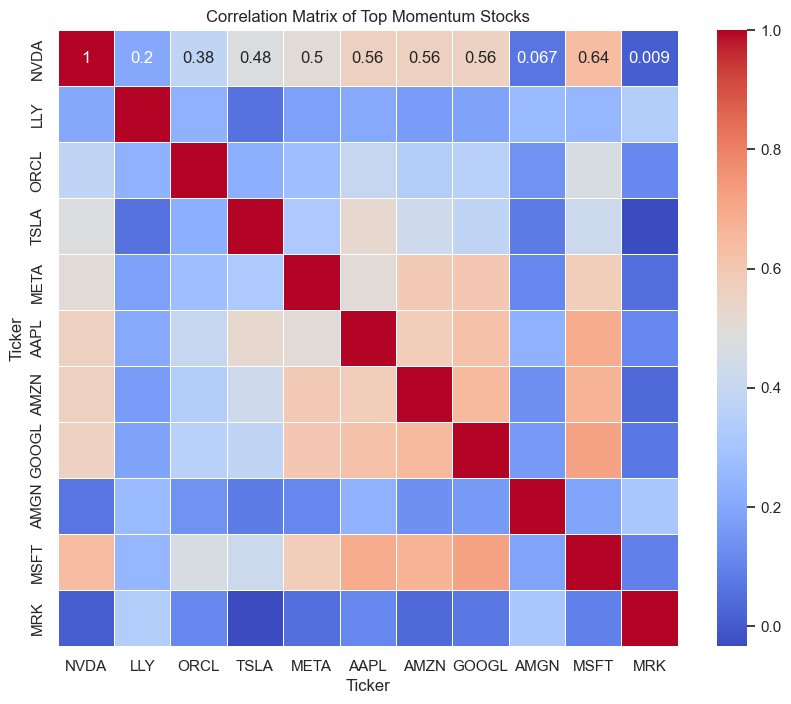

In [ ]:
# Calculate daily returns for the selected momentum stocks
momentum_returns = stock_data[ranked_momentum_stocks.index].pct_change()

# Calculate the correlation matrix
correlation_matrix = momentum_returns.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Top Momentum Stocks')
plt.show()

In [ ]:

# Set the correlation threshold
correlation_threshold = 0.6

# Calculate daily returns for the selected momentum stocks
momentum_returns = stock_data[ranked_momentum_stocks.index].pct_change()

# Calculate the correlation matrix
correlation_matrix = momentum_returns.corr()

# Identify pairs of stocks with correlations above the threshold
to_drop = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            # Mark one of the correlated pairs for removal
            to_drop.add(correlation_matrix.columns[i])

# Filter out the stocks that are too correlated
filtered_stocks = [stock for stock in ranked_momentum_stocks.index if stock not in to_drop]

print("Filtered Stocks with Low Correlation:")
print(filtered_stocks)

Filtered Stocks with Low Correlation:
['NVDA', 'LLY', 'ORCL', 'TSLA', 'META', 'AAPL', 'AMZN', 'AMGN', 'MRK']


In [ ]:
import random


# Select a random sample of 2 tickers from the list
sampled_tickers = random.sample(tickers, 2)
print(f"Randomly selected tickers: {sampled_tickers}")

Randomly selected tickers: ['GILD', 'LLY']


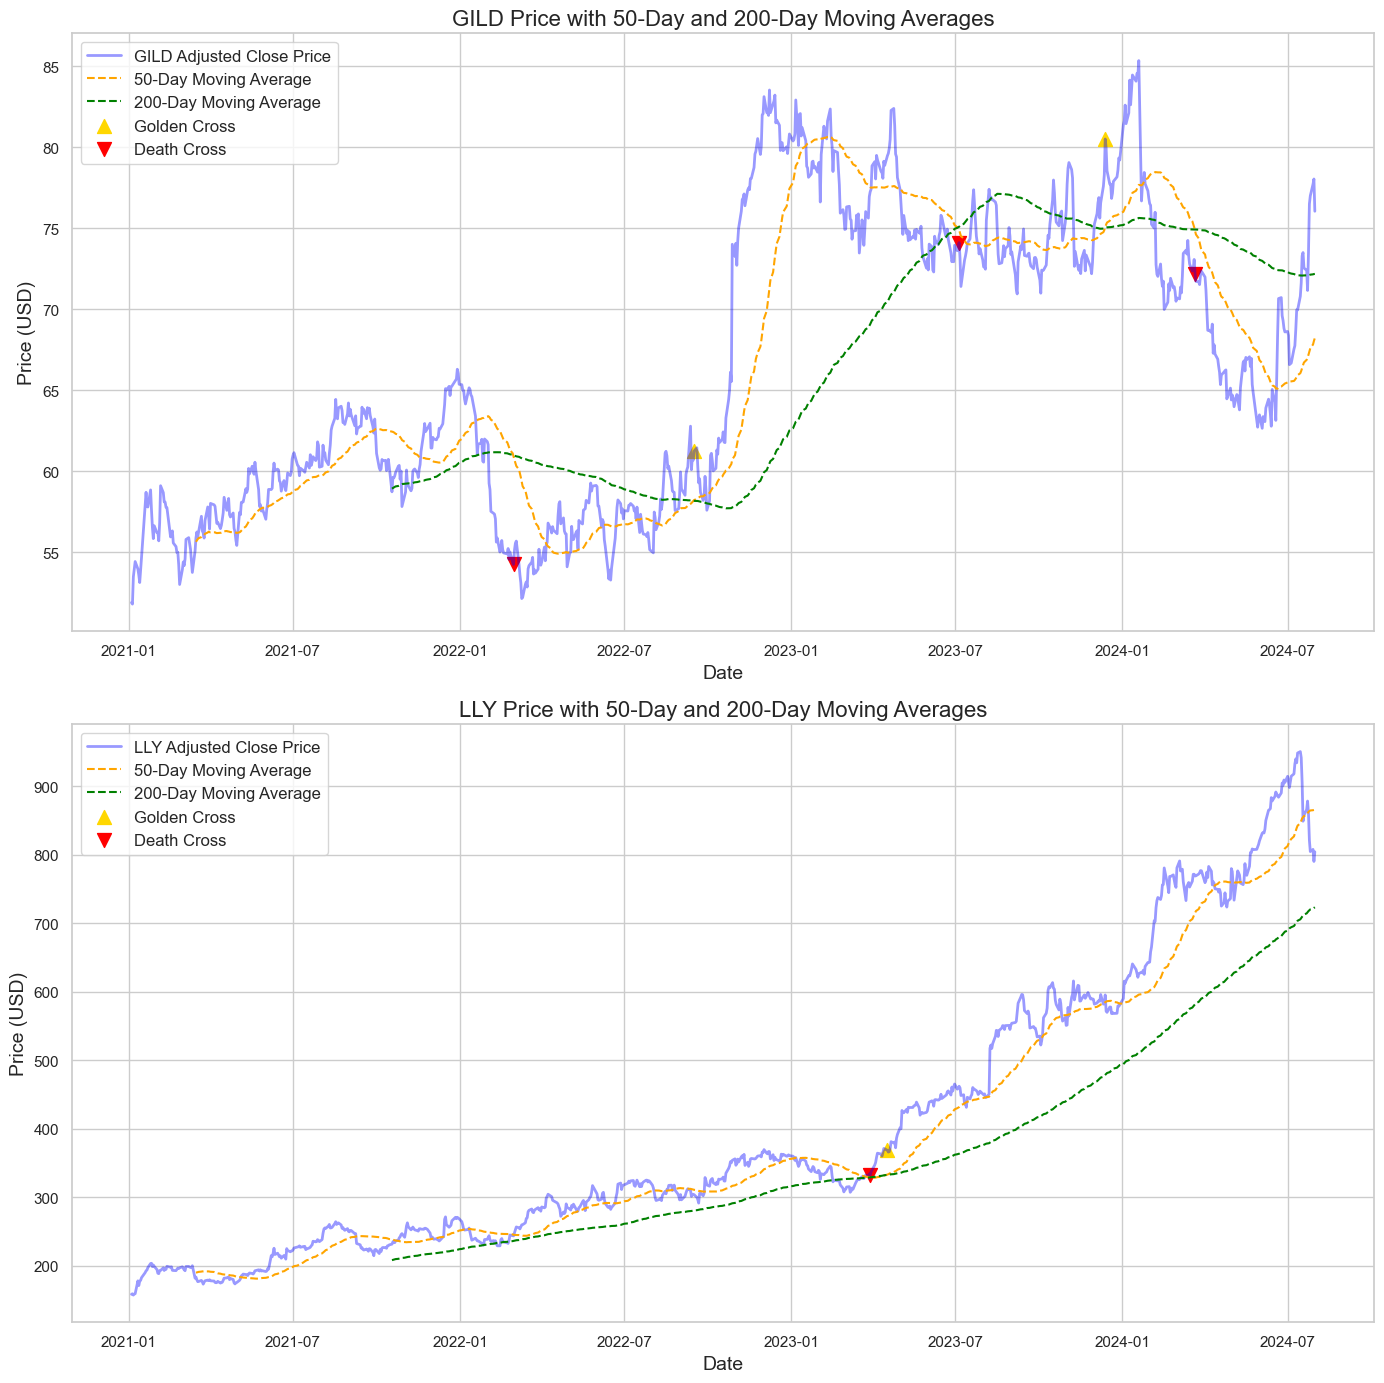

In [ ]:
# Create a figure for the subplots
plt.figure(figsize=(14, 14))

# Loop through each sampled ticker to plot the data
for i, ticker in enumerate(sampled_tickers, 1):
    # Calculate the 50-day and 200-day moving averages
    stock_data_50_MA = stock_data[ticker].rolling(window=50).mean()
    stock_data_200_MA = stock_data[ticker].rolling(window=200).mean()

    # Create a subplot for each stock
    plt.subplot(2, 1, i)

    # Plot the stock price and the moving averages
    plt.plot(stock_data[ticker], label=f'{ticker} Adjusted Close Price', color='blue', linewidth=2, alpha=0.4)
    plt.plot(stock_data_50_MA, label='50-Day Moving Average', color='orange', linestyle='--')
    plt.plot(stock_data_200_MA, label='200-Day Moving Average', color='green', linestyle='--')

    # Highlight Golden Cross and Death Cross
    golden_cross = (stock_data_50_MA > stock_data_200_MA) & (stock_data_50_MA.shift(1) <= stock_data_200_MA.shift(1))
    death_cross = (stock_data_50_MA < stock_data_200_MA) & (stock_data_50_MA.shift(1) >= stock_data_200_MA.shift(1))

    plt.scatter(stock_data.index[golden_cross], stock_data[ticker][golden_cross], label='Golden Cross', marker='^', color='gold', s=100)
    plt.scatter(stock_data.index[death_cross], stock_data[ticker][death_cross], label='Death Cross', marker='v', color='red', s=100)

    # Customize the subplot
    plt.title(f'{ticker} Price with 50-Day and 200-Day Moving Averages', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Price (USD)', fontsize=14)
    plt.legend(loc='upper left', fontsize=12)
    plt.grid(True)

# Adjust the layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
mean_return = daily_returns.mean()
median_return = daily_returns.median()
volatility = daily_returns.std()
skewness = daily_returns.skew()
kurtosis = daily_returns.kurtosis()
# Combine these measures into a DataFrame
stats_df = pd.DataFrame({
    'Mean Return': mean_return,
    'Median Return': median_return,
    'Volatility': volatility,
    'Skewness': skewness,
    'Kurtosis': kurtosis
})

# Display the DataFrame
print(stats_df)

        Mean Return  Median Return  Volatility  Skewness   Kurtosis
Ticker                                                             
AAPL       0.000749       0.000858    0.017193  0.193541   1.981963
ABBV       0.000715       0.001350    0.013118 -0.901002   4.535213
ABT        0.000065       0.000309    0.013963 -0.232915   4.055471
AMGN       0.000520      -0.000157    0.013727  0.727058   9.237558
AMZN       0.000430       0.000310    0.022473  0.119915   5.062369
BMY       -0.000196      -0.000400    0.013293  0.255559   9.197535
CSCO       0.000210       0.000227    0.014141 -1.259997  13.072393
GILD       0.000363       0.000000    0.014249  0.807306  11.722779
GOOGL      0.000958       0.001373    0.019662  0.035844   3.064707
INTC      -0.000266       0.000000    0.023120 -0.268881   3.107999
JNJ        0.000062       0.000030    0.010210  0.336857   3.177687
LLY        0.001926       0.001800    0.018244  1.197841   9.299869
META       0.001066       0.000787    0.029187 -

## EDA (Exploratoy Data Analysis)

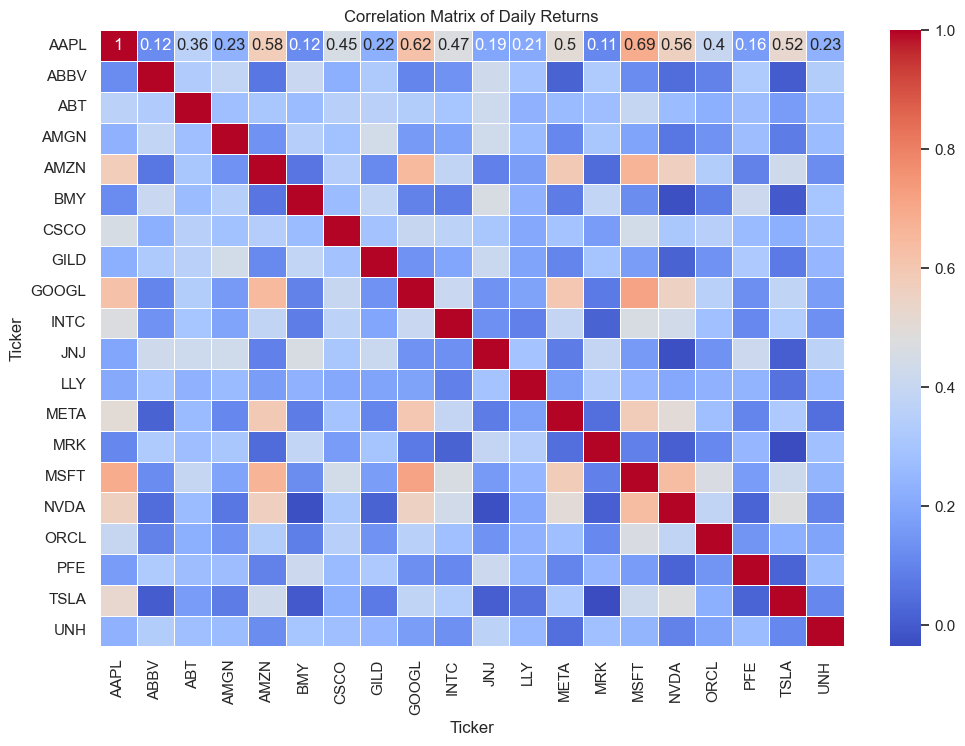

In [ ]:
# Calculate the correlation matrix
correlation_matrix = daily_returns.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Daily Returns')
plt.show()


Highly Correlated Pairs:
   Stock 1 Stock 2  Correlation
0     AAPL    AMZN     0.576393
1     AAPL   GOOGL     0.623094
2     AAPL    META     0.503110
3     AAPL    MSFT     0.689153
4     AAPL    NVDA     0.562005
5     AAPL    TSLA     0.523213
6     AMZN   GOOGL     0.645923
7     AMZN    META     0.593995
8     AMZN    MSFT     0.668233
9     AMZN    NVDA     0.563889
10   GOOGL    META     0.600982
11   GOOGL    MSFT     0.713403
12   GOOGL    NVDA     0.555794
13    META    MSFT     0.580215
14    MSFT    NVDA     0.638671


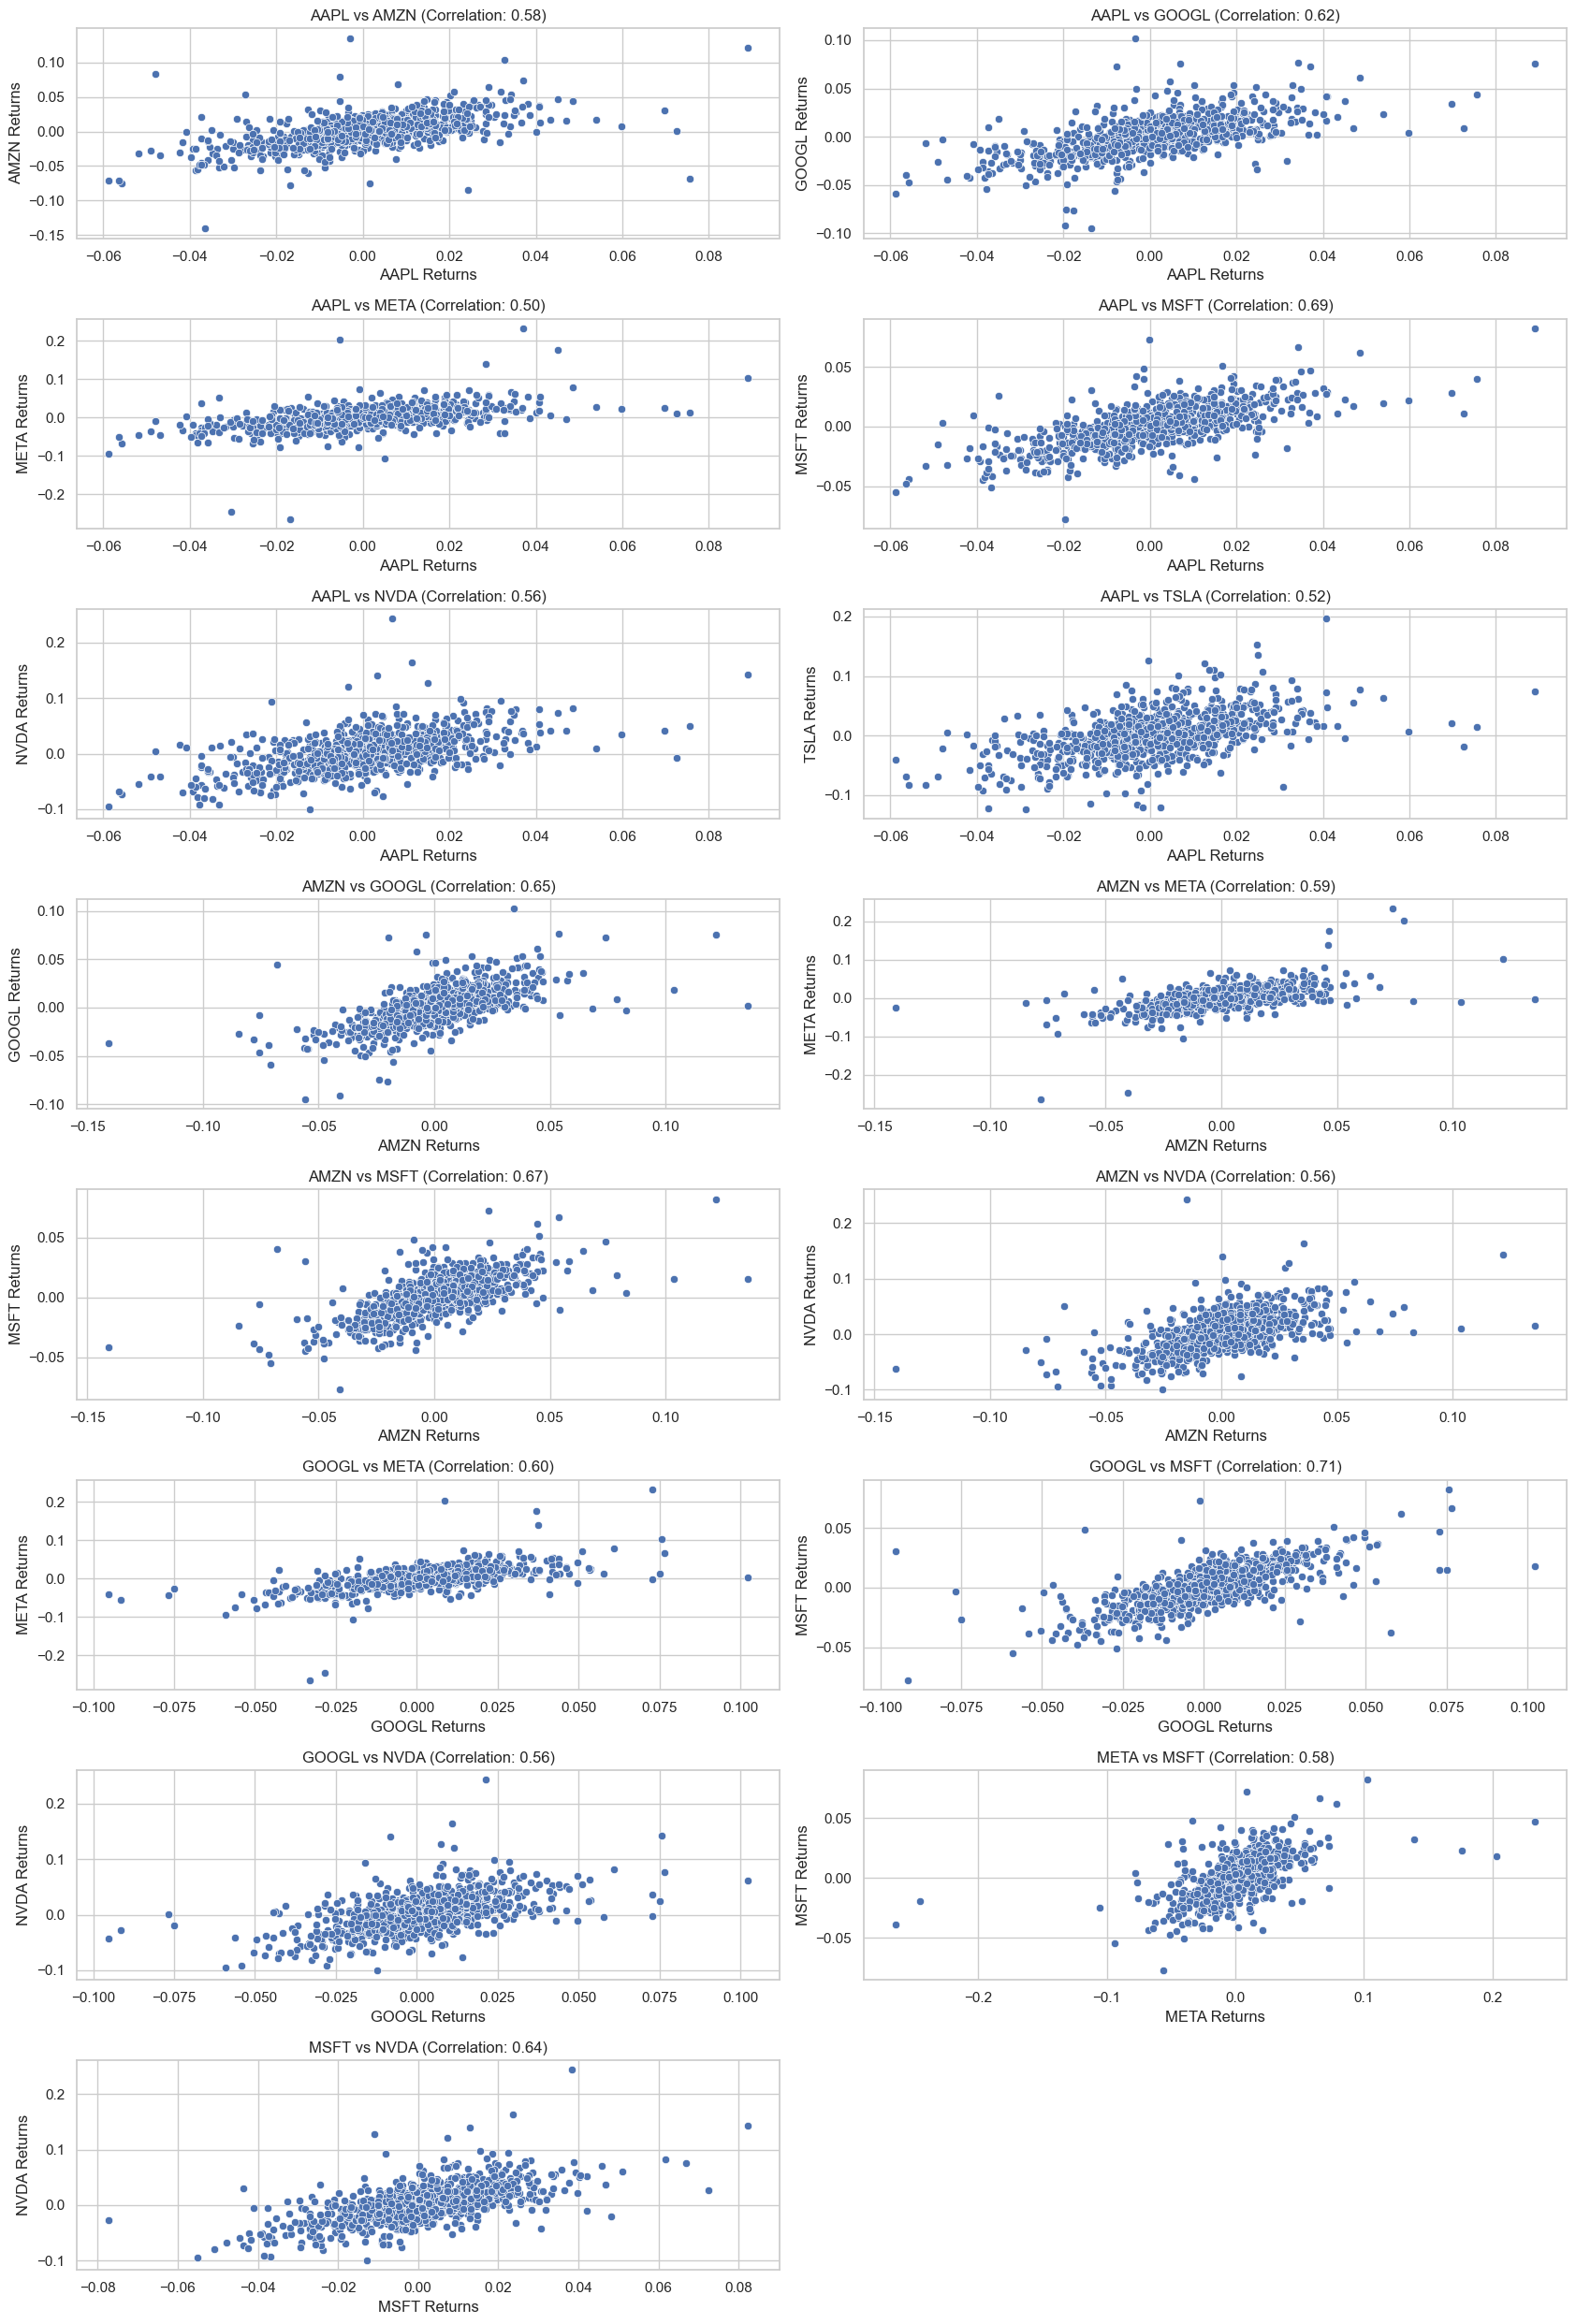

In [ ]:
# Step 2: Identify pairs with correlation above a threshold (e.g., 0.8)
threshold = 0.5
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if correlation_matrix.iloc[i, j] > threshold:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Convert the list to a DataFrame for better readability
high_corr_df = pd.DataFrame(high_corr_pairs, columns=['Stock 1', 'Stock 2', 'Correlation'])
print("Highly Correlated Pairs:")
print(high_corr_df)

# Step 3: Visualize the highly correlated pairs using scatter plots
plt.figure(figsize=(17, 25))
for index, row in high_corr_df.iterrows():
    plt.subplot(len(high_corr_df) // 2 + 1, 2, index + 1)
    sns.scatterplot(x=daily_returns[row['Stock 1']], y=daily_returns[row['Stock 2']])
    plt.title(f"{row['Stock 1']} vs {row['Stock 2']} (Correlation: {row['Correlation']:.2f})")
    plt.xlabel(row['Stock 1'] + ' Returns')
    plt.ylabel(row['Stock 2'] + ' Returns')

plt.tight_layout()
plt.show()

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import pearsonr

# Define the list of stocks to consider (you can modify this list)
stock_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'TSLA', 'BRK-B', 'JNJ', 'V', 'WMT']

# Fetch historical data
def fetch_stock_data(symbols, start_date='2020-01-01', end_date='2024-08-01'):
    data = {}
    for symbol in symbols:
        stock = yf.Ticker(symbol)
        df = stock.history(start=start_date, end=end_date)
        data[symbol] = df['Close']
    return pd.DataFrame(data)

# Clean data to handle NaNs and Infs
def clean_data(data):
    data = data.replace([np.inf, -np.inf], np.nan)  # Replace infs with NaNs
    data = data.dropna()  # Drop rows with NaNs
    return data

# Statistical Arbitrage: Pairs Trading
def statistical_arbitrage(data):
    pairs = []
    symbols = data.columns
    for i in range(len(symbols)):
        for j in range(i + 1, len(symbols)):
            corr, _ = pearsonr(data[symbols[i]], data[symbols[j]])
            if corr > 0.8:  # High historical correlation
                pairs.append((symbols[i], symbols[j], corr))
    return pairs

# Value Investing
def value_investing():
    value_stocks = []
    for symbol in stock_symbols:
        stock = yf.Ticker(symbol)
        info = stock.info
        pe_ratio = info.get('forwardPE', None)
        pb_ratio = info.get('priceToBook', None)
        dividend_yield = info.get('dividendYield', None)
        if pe_ratio and pb_ratio and dividend_yield:
            if pe_ratio < 15 and pb_ratio < 1.5 and dividend_yield > 0.02:
                value_stocks.append(symbol)
    return value_stocks

# Momentum Investing
def momentum_investing(data):
    momentum_stocks = data.pct_change(periods=252).iloc[-1].sort_values(ascending=False)
    return momentum_stocks.head(5).index.tolist()

# Fetch the data
stock_data = fetch_stock_data(stock_symbols)

# Clean the data
cleaned_stock_data = clean_data(stock_data)

# Apply the strategies
pairs = statistical_arbitrage(cleaned_stock_data)
value_stocks = value_investing()
momentum_stocks = momentum_investing(cleaned_stock_data)

print("Pairs for Statistical Arbitrage:")
print(pairs)
print("\nValue Stocks:")
print(value_stocks)
print("\nMomentum Stocks:")
print(momentum_stocks)


Pairs for Statistical Arbitrage:
[('AAPL', 'MSFT', 0.9092513122954475), ('AAPL', 'GOOGL', 0.8628019551647852), ('AAPL', 'BRK-B', 0.9034832036161282), ('AAPL', 'WMT', 0.813280402827786), ('MSFT', 'GOOGL', 0.9237990399202344), ('MSFT', 'BRK-B', 0.9236323671056217), ('MSFT', 'V', 0.8949345216119806), ('MSFT', 'WMT', 0.8908170563319905), ('GOOGL', 'BRK-B', 0.8533367958729746), ('BRK-B', 'V', 0.8703697011027471), ('BRK-B', 'WMT', 0.8641810567074529), ('V', 'WMT', 0.8509982882213951)]

Value Stocks:
[]

Momentum Stocks:
['AMZN', 'WMT', 'GOOGL', 'MSFT', 'BRK-B']


In [ ]:
pairs = statistical_arbitrage(cleaned_stock_data)


<Axes: xlabel='Date'>

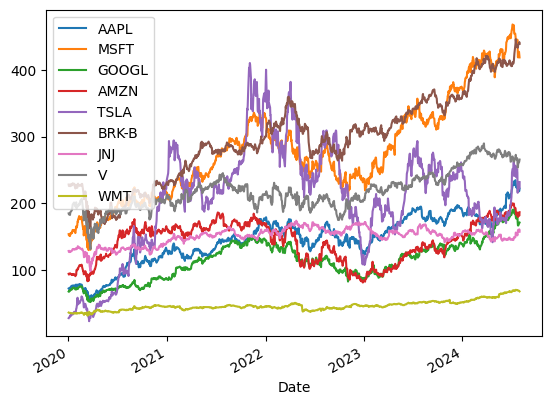

In [ ]:
cleaned_stock_data.plot()

<Axes: xlabel='Date'>

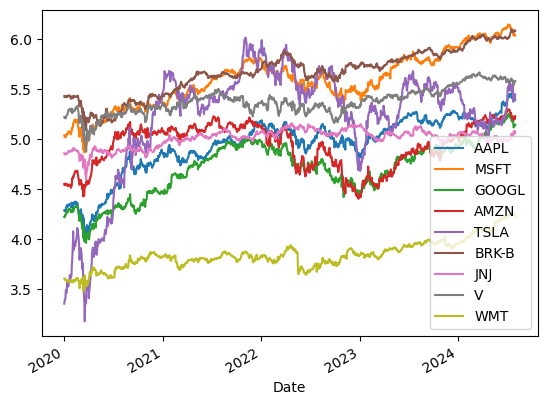

In [ ]:
np.log(cleaned_stock_data).plot()

In [ ]:
momentum_stocks = momentum_investing(cleaned_stock_data)


In [ ]:
momentum_stocks

['JNJ', 'BRK-B', 'WMT', 'V', 'AAPL']